# HOUSING: PRICE PREDICTION(Surprise Housing)

### Problem Gist
>Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the worlds economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modeling, Market mix modeling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the .CSV file below.
The company is looking at prospective properties to buy houses to enter the market. We are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
>1. Which variables are important to predict the price of variable?
>2. How do these variables describe the price of the house?

### Problem Definition.
>We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Technical Requirements:
>1. Data contains 1460 entries each having 81 variables.
>2. Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
>3. Extensive EDA has to be performed to gain relationships of important variable and price.
>4. Data contains numerical as well as categorical variable. You need to handle them accordingly.
>5. You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
>6. You need to find important features which affect the price positively or negatively.
>7. Two datasets

### We will start our Analysis in importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

importing the Data

In [2]:
df_train = pd.read_csv("C:/Users/Friday/Downloads/Project-Housing/Project-Housing_splitted/train.csv")
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Columns Description:
Sr.No	Columns names

1.	MSSubClass: Identifies the type of dwelling involved in the sale.			
				
	20	1-STORY 1946 & NEWER ALL STYLES		
	30	1-STORY 1945 & OLDER		
	40	1-STORY W/FINISHED ATTIC ALL AGES		
	45	1-1/2 STORY - UNFINISHED ALL AGES		
	50	1-1/2 STORY FINISHED ALL AGES		
	60	2-STORY 1946 & NEWER		
	70	2-STORY 1945 & OLDER		
	75	2-1/2 STORY ALL AGES		
	80	SPLIT OR MULTI-LEVEL		
	85	SPLIT FOYER		
	90	DUPLEX - ALL STYLES AND AGES		
	120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER		
	150	1-1/2 STORY PUD - ALL AGES		
	160	2-STORY PUD - 1946 & NEWER		
	180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER		
	190	2 FAMILY CONVERSION - ALL STYLES AND AGES		
				
2.	MSZoning: Identifies the general zoning classification of the sale.			
				
	       A	Agriculture		
	       C	Commercial		
	       FV	Floating Village Residential		
	       I	Industrial		
	       RH	Residential High Density		
	       RL	Residential Low Density		
	       RP	Residential Low Density Park 		
	       RM	Residential Medium Density		
				
3.	LotFrontage: Linear feet of street connected to property			
				
4.	LotArea: Lot size in square feet			
				
5.	Street: Type of road access to property			
				
	       Grvl	Gravel		
	       Pave	Paved		
	       			
6.	Alley: Type of alley access to property			
				
	       Grvl	Gravel		
	       Pave	Paved		
	       NA 	No alley access		
				
7.	LotShape: General shape of property			
				
	       Reg	Regular		
	       IR1	Slightly irregular		
	       IR2	Moderately Irregular		
	       IR3	Irregular		
	       			
8.	LandContour: Flatness of the property			
				
	       Lvl	Near Flat/Level		
	       Bnk	Banked - Quick and significant rise from street grade to building		
	       HLS	Hillside - Significant slope from side to side		
	       Low	Depression		
				
9.	Utilities: Type of utilities available			
				
	       AllPub	All public Utilities (E,G,W,& S)		
	       NoSewr	Electricity, Gas, and Water (Septic Tank)		
	       NoSeWa	Electricity and Gas Only		
	       ELO	Electricity only		
				
10.	LotConfig: Lot configuration			
				
	       Inside	Inside lot		
	       Corner	Corner lot		
	       CulDSac	Cul-de-sac		
	       FR2	Frontage on 2 sides of property		
	       FR3	Frontage on 3 sides of property		
				
11.	LandSlope: Slope of property			
				
	       Gtl	Gentle slope		
	       Mod	Moderate Slope		
	       Sev	Severe Slope		
				
12.	Neighborhood: Physical locations within Ames city limits			
				
	       Blmngtn	Bloomington Heights		
	       Blueste	Bluestem		
	       BrDale	Briardale		
	       BrkSide	Brookside		
	       ClearCr	Clear Creek		
	       CollgCr	College Creek		
	       Crawfor	Crawford		
	       Edwards	Edwards		
	       Gilbert	Gilbert		
	       IDOTRR	Iowa DOT and Rail Road		
	       MeadowV	Meadow Village		
	       Mitchel	Mitchell		
	       Names	North Ames		
	       NoRidge	Northridge		
	       NPkVill	Northpark Villa		
	       NridgHt	Northridge Heights		
	       NWAmes	Northwest Ames		
	       OldTown	Old Town		
	       SWISU	South & West of Iowa State University		
	       Sawyer	Sawyer		
	       SawyerW	Sawyer West		
	       Somerst	Somerset		
	       StoneBr	Stone Brook		
	       Timber	Timberland		
	       Veenker	Veenker		
				
13.	Condition1: Proximity to various conditions			
				
	       Artery	Adjacent to arterial street		
	       Feedr	Adjacent to feeder street		
	       Norm	Normal		
	       RRNn	Within 200' of North-South Railroad		
	       RRAn	Adjacent to North-South Railroad		
	       PosN	Near positive off-site feature--park, greenbelt, etc.		
	       PosA	Adjacent to postive off-site feature		
	       RRNe	Within 200' of East-West Railroad		
	       RRAe	Adjacent to East-West Railroad		
				
14.	Condition2: Proximity to various conditions (if more than one is present)			
				
	       Artery	Adjacent to arterial street		
	       Feedr	Adjacent to feeder street		
	       Norm	Normal		
	       RRNn	Within 200' of North-South Railroad		
	       RRAn	Adjacent to North-South Railroad		
	       PosN	Near positive off-site feature--park, greenbelt, etc.		
	       PosA	Adjacent to postive off-site feature		
	       RRNe	Within 200' of East-West Railroad		
	       RRAe	Adjacent to East-West Railroad		
				
15.	BldgType: Type of dwelling			
				
	       1Fam	Single-family Detached		
	       2FmCon	Two-family Conversion; originally built as one-family dwelling		
	       Duplx	Duplex		
	       TwnhsE	Townhouse End Unit		
	       TwnhsI	Townhouse Inside Unit		
				
16.	HouseStyle: Style of dwelling			
				
	       1Story	One story		
	       1.5Fin	One and one-half story: 2nd level finished		
	       1.5Unf	One and one-half story: 2nd level unfinished		
	       2Story	Two story		
	       2.5Fin	Two and one-half story: 2nd level finished		
	       2.5Unf	Two and one-half story: 2nd level unfinished		
	       SFoyer	Split Foyer		
	       SLvl	Split Level		
				
17.	OverallQual: Rates the overall material and finish of the house			
				
	10	Very Excellent		
	9	Excellent		
	8	Very Good		
	7	Good		
	6	Above Average		
	5	Average		
	4	Below Average		
	3	Fair		
	2	Poor		
	1	Very Poor		
				
18.	OverallCond: Rates the overall condition of the house			
				
	10	Very Excellent		
	9	Excellent		
	8	Very Good		
	7	Good		
	6	Above Average		
	5	Average		
	4	Below Average		
	3	Fair		
	2	Poor		
	1	Very Poor		
				
19.	YearBuilt: Original construction date			
				
20.	YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)			
				
21.	RoofStyle: Type of roof			
				
	       Flat	Flat		
	       Gable	Gable		
	       Gambrel	Gabrel (Barn)		
	       Hip	Hip		
	       Mansard	Mansard		
	       Shed	Shed		
				
22.	RoofMatl: Roof material			
				
	       ClyTile	Clay or Tile		
	       CompShg	Standard (Composite) Shingle		
	       Membran	Membrane		
	       Metal	Metal		
	       Roll	Roll		
	       Tar&Grv	Gravel & Tar		
	       WdShake	Wood Shakes		
	       WdShngl	Wood Shingles		
				
23.	Exterior1st: Exterior covering on house			
				
	       AsbShng	Asbestos Shingles		
	       AsphShn	Asphalt Shingles		
	       BrkComm	Brick Common		
	       BrkFace	Brick Face		
	       CBlock	Cinder Block		
	       CemntBd	Cement Board		
	       HdBoard	Hard Board		
	       ImStucc	Imitation Stucco		
	       MetalSd	Metal Siding		
	       Other	Other		
	       Plywood	Plywood		
	       PreCast	PreCast		
	       Stone	Stone		
	       Stucco	Stucco		
	       VinylSd	Vinyl Siding		
	       Wd Sdng	Wood Siding		
	       WdShing	Wood Shingles		
				
24.	Exterior2nd: Exterior covering on house (if more than one material)			
				
	       AsbShng	Asbestos Shingles		
	       AsphShn	Asphalt Shingles		
	       BrkComm	Brick Common		
	       BrkFace	Brick Face		
	       CBlock	Cinder Block		
	       CemntBd	Cement Board		
	       HdBoard	Hard Board		
	       ImStucc	Imitation Stucco		
	       MetalSd	Metal Siding		
	       Other	Other		
	       Plywood	Plywood		
	       PreCast	PreCast		
	       Stone	Stone		
	       Stucco	Stucco		
	       VinylSd	Vinyl Siding		
	       Wd Sdng	Wood Siding		
	       WdShing	Wood Shingles		
				
25.	MasVnrType: Masonry veneer type			
				
	       BrkCmn	Brick Common		
	       BrkFace	Brick Face		
	       CBlock	Cinder Block		
	       None	None		
	       Stone	Stone		
				
26.	MasVnrArea: Masonry veneer area in square feet			
				
27.	ExterQual: Evaluates the quality of the material on the exterior 			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Average/Typical		
	       Fa	Fair		
	       Po	Poor		
				
28.	ExterCond: Evaluates the present condition of the material on the exterior			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Average/Typical		
	       Fa	Fair		
	       Po	Poor		
				
29.	Foundation: Type of foundation			
				
	       BrkTil	Brick & Tile		
	       CBlock	Cinder Block		
	       PConc	Poured Contrete		
	       Slab	Slab		
	       Stone	Stone		
	       Wood	Wood		
				
30.	BsmtQual: Evaluates the height of the basement			
				
	       Ex	Excellent (100+ inches)		
	       Gd	Good (90-99 inches)		
	       TA	Typical (80-89 inches)		
	       Fa	Fair (70-79 inches)		
	       Po	Poor (<70 inches		
	       NA	No Basement		
				
31.	BsmtCond: Evaluates the general condition of the basement			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Typical - slight dampness allowed		
	       Fa	Fair - dampness or some cracking or settling		
	       Po	Poor - Severe cracking, settling, or wetness		
	       NA	No Basement		
				
32.	BsmtExposure: Refers to walkout or garden level walls			
				
	       Gd	Good Exposure		
	       Av	Average Exposure (split levels or foyers typically score average or above)		
	       Mn	Mimimum Exposure		
	       No	No Exposure		
	       NA	No Basement		
				
33.	BsmtFinType1: Rating of basement finished area			
				
	       GLQ	Good Living Quarters		
	       ALQ	Average Living Quarters		
	       BLQ	Below Average Living Quarters		
	       Rec	Average Rec Room		
	       LwQ	Low Quality		
	       Unf	Unfinshed		
	       NA	No Basement		
				
34.	BsmtFinSF1: Type 1 finished square feet			
				
35.	BsmtFinType2: Rating of basement finished area (if multiple types)			
				
	       GLQ	Good Living Quarters		
	       ALQ	Average Living Quarters		
	       BLQ	Below Average Living Quarters		
	       Rec	Average Rec Room		
	       LwQ	Low Quality		
	       Unf	Unfinshed		
	       NA	No Basement		
				
36.	BsmtFinSF2: Type 2 finished square feet			
				
37.	BsmtUnfSF: Unfinished square feet of basement area			
				
38.	TotalBsmtSF: Total square feet of basement area			
				
39.	Heating: Type of heating			
				
	       Floor	Floor Furnace		
	       GasA	Gas forced warm air furnace		
	       GasW	Gas hot water or steam heat		
	       Grav	Gravity furnace		
	       OthW	Hot water or steam heat other than gas		
	       Wall	Wall furnace		
				
40.	HeatingQC: Heating quality and condition			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Average/Typical		
	       Fa	Fair		
	       Po	Poor		
				
41.	CentralAir: Central air conditioning			
				
	       N	No		
	       Y	Yes		
				
42.	Electrical: Electrical system			
				
	       SBrkr	Standard Circuit Breakers & Romex		
	       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)		
	       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)		
	       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)		
	       Mix	Mixed		
				
43.	1stFlrSF: First Floor square feet			
	 			
44.	2ndFlrSF: Second floor square feet			
				
45.	LowQualFinSF: Low quality finished square feet (all floors)			
				
46.	GrLivArea: Above grade (ground) living area square feet			
				
47.	BsmtFullBath: Basement full bathrooms			
				
48.	BsmtHalfBath: Basement half bathrooms			
				
49.	FullBath: Full bathrooms above grade			
				
50.	HalfBath: Half baths above grade			
				
51.	Bedroom: Bedrooms above grade (does NOT include basement bedrooms)			
				
52.	Kitchen: Kitchens above grade			
				
53.	KitchenQual: Kitchen quality			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Typical/Average		
	       Fa	Fair		
	       Po	Poor		
	       			
54.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)			
				
55.	Functional: Home functionality (Assume typical unless deductions are warranted)			
				
	       Typ	Typical Functionality		
	       Min1	Minor Deductions 1		
	       Min2	Minor Deductions 2		
	       Mod	Moderate Deductions		
	       Maj1	Major Deductions 1		
	       Maj2	Major Deductions 2		
	       Sev	Severely Damaged		
	       Sal	Salvage only		
				
56.	Fireplaces: Number of fireplaces			
				
57.	FireplaceQu: Fireplace quality			
				
	       Ex	Excellent - Exceptional Masonry Fireplace		
	       Gd	Good - Masonry Fireplace in main level		
	       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement		
	       Fa	Fair - Prefabricated Fireplace in basement		
	       Po	Poor - Ben Franklin Stove		
	       NA	No Fireplace		
				
58.	GarageType: Garage location			
				
	       2Types	More than one type of garage		
	       Attchd	Attached to home		
	       Basment	Basement Garage		
	       BuiltIn	Built-In (Garage part of house - typically has room above garage)		
	       CarPort	Car Port		
	       Detchd	Detached from home		
	       NA	No Garage		
				
59.	GarageYrBlt: Year garage was built			
				
60.	GarageFinish: Interior finish of the garage			
				
	       Fin	Finished		
	       RFn	Rough Finished		
	       Unf	Unfinished		
	       NA	No Garage		
				
61.	GarageCars: Size of garage in car capacity			
				
62.	GarageArea: Size of garage in square feet			
				
63.	GarageQual: Garage quality			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Typical/Average		
	       Fa	Fair		
	       Po	Poor		
	       NA	No Garage		
				
64.	GarageCond: Garage condition			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Typical/Average		
	       Fa	Fair		
	       Po	Poor		
	       NA	No Garage		
				
65.	PavedDrive: Paved driveway			
				
	       Y	Paved 		
	       P	Partial Pavement		
	       N	Dirt/Gravel		
				
66.	WoodDeckSF: Wood deck area in square feet			
				
67.	OpenPorchSF: Open porch area in square feet			
				
68.	EnclosedPorch: Enclosed porch area in square feet			
				
69.	3SsnPorch: Three season porch area in square feet			
				
70.	ScreenPorch: Screen porch area in square feet			
				
71.	PoolArea: Pool area in square feet			
				
72.	PoolQC: Pool quality			
				
	       Ex	Excellent		
	       Gd	Good		
	       TA	Average/Typical		
	       Fa	Fair		
	       NA	No Pool		
				
73.	Fence: Fence quality			
				
	       GdPrv	Good Privacy		
	       MnPrv	Minimum Privacy		
	       GdWo	Good Wood		
	       MnWw	Minimum Wood/Wire		
	       NA	No Fence		
				
74.	MiscFeature: Miscellaneous feature not covered in other categories			
				
	       Elev	Elevator		
	       Gar2	2nd Garage (if not described in garage section)		
	       Othr	Other		
	       Shed	Shed (over 100 SF)		
	       TenC	Tennis Court		
	       NA	None		
				
76.	MiscVal: $Value of miscellaneous feature			
				
77.	MoSold: Month Sold (MM)			
				
78.	YrSold: Year Sold (YYYY)			
				
79.	SaleType: Type of sale			
				
	       WD 	Warranty Deed - Conventional		
	       CWD	Warranty Deed - Cash		
	       VWD	Warranty Deed - VA Loan		
	       New	Home just constructed and sold		
	       COD	Court Officer Deed/Estate		
	       Con	Contract 15% Down payment regular terms		
	       ConLw	Contract Low Down payment and low interest		
	       ConLI	Contract Low Interest		
	       ConLD	Contract Low Down		
	       Oth	Other		
				
80.	SaleCondition: Condition of sale			
				
	       Normal	Normal Sale		
	       Abnorml	Abnormal Sale -  trade, foreclosure, short sale		
	       AdjLand	Adjoining Land Purchase		
	       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit		
	       Family	Sale between family members		
	       Partial	Home was not completed when last assessed (associated with New Homes)		


# EDA

In [4]:
df_train.duplicated().sum()

0

From Above we can see that the data have no duplicates or no repeated data.

In [5]:
len(df_train.Id.unique())

1168

Id have unique data in all the rows

### We will drop Id column since it wont be that helpful on prediction and we will split the data into 4 parts to make our analysis easier.

In [6]:
def Drop_id(df): ###droping the id column.
    """Function that drops Id column"""
    df.drop('Id', axis=1, inplace = True)
    return df
    

In [7]:
df_train = Drop_id(df_train)

In [8]:
df_train1, df_train2, df_train3, df_train4, df_Target = df_train.iloc[:,:20], df_train.iloc[:,20:40], df_train.iloc[:,40:64], df_train.iloc[:,64:79], df_train['SalePrice']

###Splitting the Table.

In [9]:
df_train1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
dtype: int64

1. LotFrontage: Linear feet of street connected to property
2. Alley: Type of alley access to property

 Grvl    Gravel        
 Pave    Paved        
 NA     No alley access

In [10]:
def Filling_NaN1(df): ####### Filling NaN values in the First table
    df['Alley'].replace(np.nan, 'No_access', inplace = True)
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(df_train1[['LotArea','LotFrontage']])
    df[['LotArea','LotFrontage']] = np.round(imp.transform(df[['LotArea','LotFrontage']]))
    return df

In [11]:
df_train1 = Filling_NaN1(df_train1)

In [12]:
df_train1.isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

We have imputed the missing values in df_train1 lets move on to the df_train2

In [13]:
df_train2.isnull().sum()

RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       7
MasVnrArea       7
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinSF1       0
BsmtFinType2    31
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
dtype: int64

1. MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

2. MasVnrArea: Masonry veneer area in square feet

2. BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
2. BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
2. BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
2. BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

7. BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


In [14]:
def Filling_NaN2(df): ####### Filling NaN values in the third table
    for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']:
        df[i].replace(np.nan, 'No_Basement', inplace = True)
    
    df['MasVnrType'].replace(np.nan,df['MasVnrType'].describe().top, inplace = True)
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    df[['MasVnrArea', 'TotalBsmtSF']] = np.round(imp.fit_transform(df[['MasVnrArea', 'TotalBsmtSF']]))
    return df

In [15]:
df_train2 = Filling_NaN2(df_train2)

In [16]:
df_train2.isnull().sum()

RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
dtype: int64

Table 3

In [17]:
df_train3.isnull().sum()

CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     551
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageCars        0
GarageArea        0
GarageQual       64
GarageCond       64
dtype: int64

1. FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

2. GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

3. GarageYrBlt: Year garage was built
		
4. GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
5. GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
6. GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [18]:
df_train3.loc[df_train3.GarageType.isnull(), 'GarageYrBlt'].unique()

array([nan])

From above we can notice that since there is no information in GarageType the GarageYrBlt is also null so we can replace null values as no_Garage

In [19]:
def Filling_NaN3(df): ####### Filling NaN values in the second tabel.
    for i in ['GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond']:
        df[i].replace(np.nan, 'No_Garage', inplace = True)
    df_train3['GarageYrBlt'] = df_train3['GarageYrBlt'].astype(str)    
    df['FireplaceQu'].replace(np.nan, 'No_Fireplace', inplace = True)
    return df

In [20]:
df_train3 = Filling_NaN3(df_train3)

In [21]:
df_train3.isnull().sum()

CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

table 4

In [22]:
df_train4.isnull().sum()

PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
dtype: int64

1. PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
2. Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
3. MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [23]:
def Filling_NaN4(df): ####### Filling NaN values in the forth table
    df['PoolQC'].replace(np.nan, 'No_Pool', inplace = True)
    df['Fence'].replace(np.nan, 'No_Fence', inplace = True)
    df['MiscFeature'].replace(np.nan, 'None', inplace = True)
    return df

In [24]:
df_train4 = Filling_NaN4(df_train4)

In [25]:
df_train4.isnull().sum()

PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

###### We have cleared all the Null values lets do some analysis to determine which factors are important in determining the sales cost

### Univariate analysis.

### Table 1

In [26]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1168 non-null   int64  
 1   MSZoning      1168 non-null   object 
 2   LotFrontage   1168 non-null   float64
 3   LotArea       1168 non-null   float64
 4   Street        1168 non-null   object 
 5   Alley         1168 non-null   object 
 6   LotShape      1168 non-null   object 
 7   LandContour   1168 non-null   object 
 8   Utilities     1168 non-null   object 
 9   LotConfig     1168 non-null   object 
 10  LandSlope     1168 non-null   object 
 11  Neighborhood  1168 non-null   object 
 12  Condition1    1168 non-null   object 
 13  Condition2    1168 non-null   object 
 14  BldgType      1168 non-null   object 
 15  HouseStyle    1168 non-null   object 
 16  OverallQual   1168 non-null   int64  
 17  OverallCond   1168 non-null   int64  
 18  YearBuilt     1168 non-null 

In [27]:
df_train1[['LotFrontage','LotArea']].describe()

LotFrontage        LotArea
count  1168.000000    1168.000000
mean     72.678938   10484.749144
std      29.781705    8957.442311
min      21.000000    1300.000000
25%      60.000000    7621.500000
50%      70.000000    9522.500000
75%      80.000000   11515.500000
max     472.000000  164660.000000

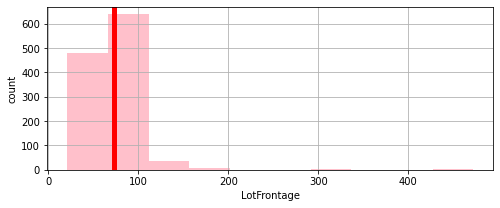

MATHEMATICAL SUMMARY OF LotFrontage :
 count    1168.000000
mean       72.678938
std        29.781705
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       472.000000
Name: LotFrontage, dtype: float64


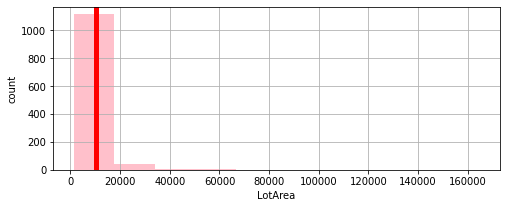

MATHEMATICAL SUMMARY OF LotArea :
 count      1168.000000
mean      10484.749144
std        8957.442311
min        1300.000000
25%        7621.500000
50%        9522.500000
75%       11515.500000
max      164660.000000
Name: LotArea, dtype: float64


In [28]:
for i in ['LotFrontage','LotArea']:
    df_train1[i].hist(bins =10,figsize=(8,3), color ="pink")
    plt.axvline(np.mean(df_train1[i]), linewidth = 5, color = "red", label = "Mean (i)")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    print("MATHEMATICAL SUMMARY OF", i ,":\n",\
          df_train1[i].describe())

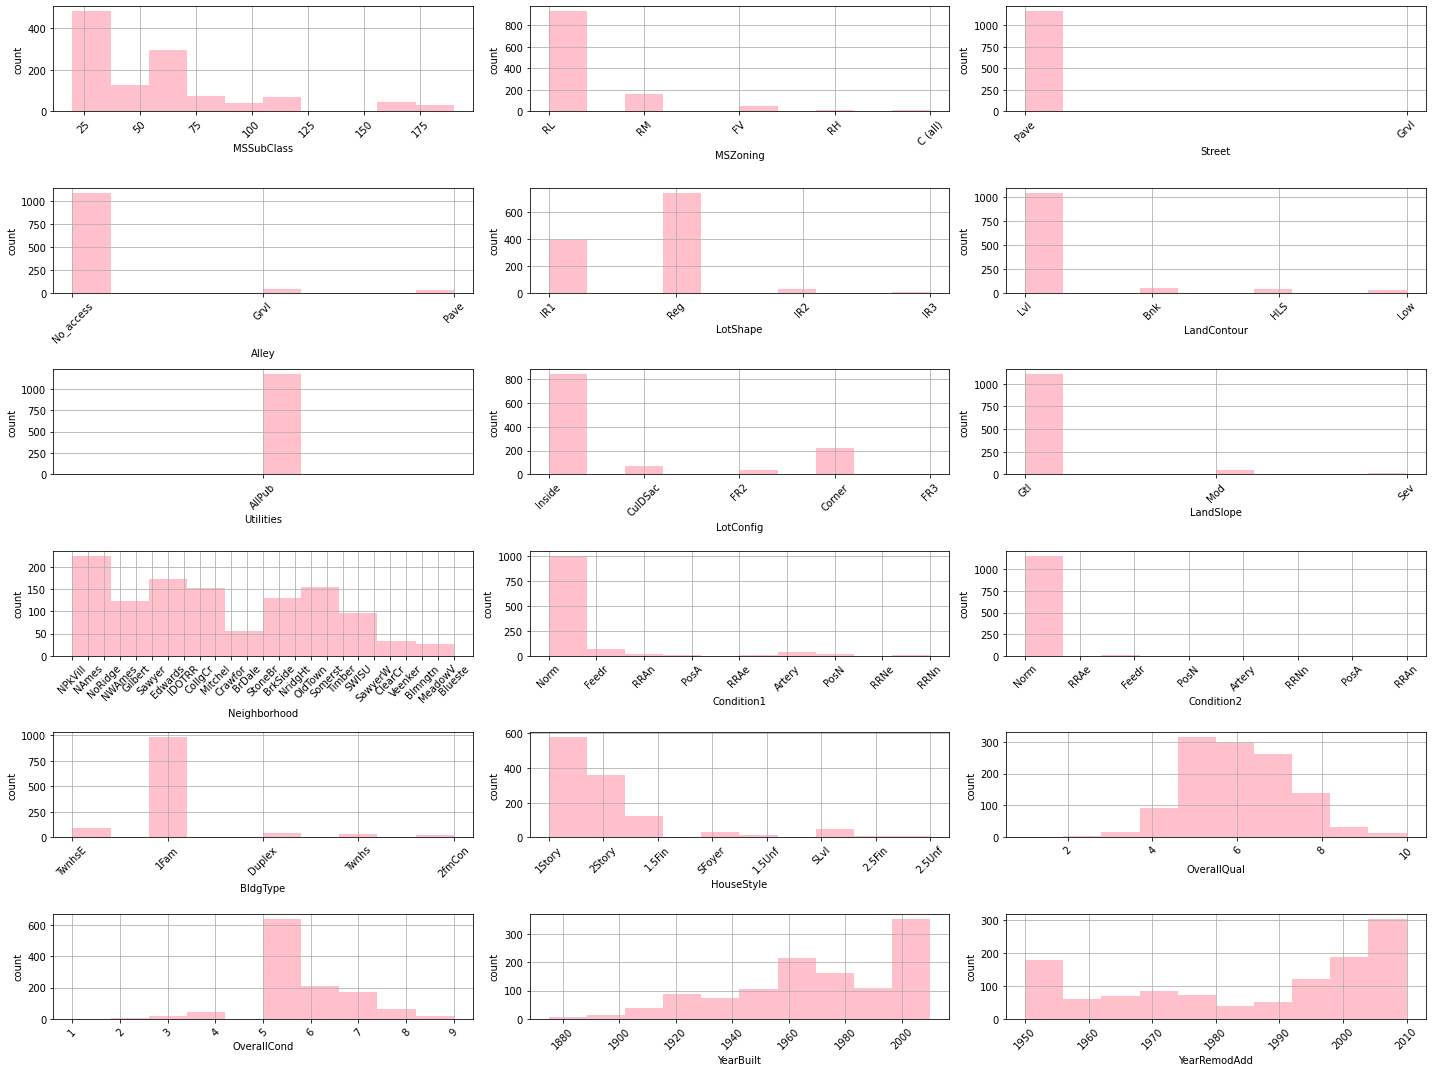

In [29]:
c = ['MSSubClass', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

for i in range (0, len(c)):
    plt.subplot(6,3,i+1) 
    df_train1[c[i]].hist(bins =10,figsize=(20,15), color ="pink")
    plt.xlabel(c[i])
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.tight_layout()

### Key Observations:
1. 20-(1-STORY 1946 & NEWER ALL STYLES), 30-(1-STORY 1945 & OLDER) are high in number.
2. Residential Low Density are also high in number, Street access are mostly payment.
3. Built in year after 2000 are high and year re-modify after 2010 are higher.
4. Mostly No access to Alley, Lot shape is mostly regular land contour is most nearly flat.
5. Utilities are mostly all public utilities lot configuration is inside lot are mostly high and lot are mostly are not sloppy.
6. Neighborhood north park villa, Condition is mostly normal.
7. type of building is single family and 1-story building and over all Quality and conditions are average and above average.


### Table 2

In [30]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoofStyle     1168 non-null   object 
 1   RoofMatl      1168 non-null   object 
 2   Exterior1st   1168 non-null   object 
 3   Exterior2nd   1168 non-null   object 
 4   MasVnrType    1168 non-null   object 
 5   MasVnrArea    1168 non-null   float64
 6   ExterQual     1168 non-null   object 
 7   ExterCond     1168 non-null   object 
 8   Foundation    1168 non-null   object 
 9   BsmtQual      1168 non-null   object 
 10  BsmtCond      1168 non-null   object 
 11  BsmtExposure  1168 non-null   object 
 12  BsmtFinType1  1168 non-null   object 
 13  BsmtFinSF1    1168 non-null   int64  
 14  BsmtFinType2  1168 non-null   object 
 15  BsmtFinSF2    1168 non-null   int64  
 16  BsmtUnfSF     1168 non-null   int64  
 17  TotalBsmtSF   1168 non-null   float64
 18  Heating       1168 non-null 

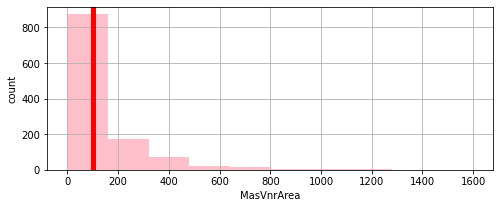

MATHEMATICAL SUMMARY OF MasVnrArea :
 count    1168.000000
mean      102.590753
std       182.168633
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


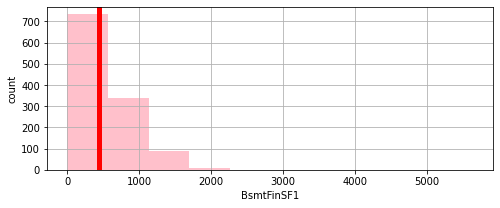

MATHEMATICAL SUMMARY OF BsmtFinSF1 :
 count    1168.000000
mean      444.726027
std       462.664785
min         0.000000
25%         0.000000
50%       385.500000
75%       714.500000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


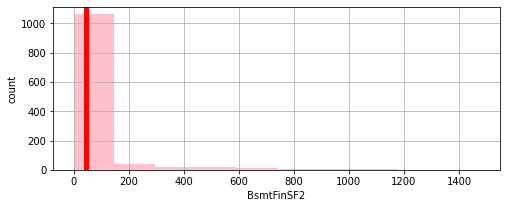

MATHEMATICAL SUMMARY OF BsmtFinSF2 :
 count    1168.000000
mean       46.647260
std       163.520016
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


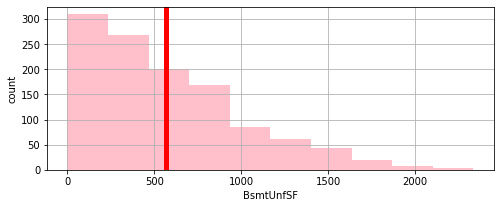

MATHEMATICAL SUMMARY OF BsmtUnfSF :
 count    1168.000000
mean      569.721747
std       449.375525
min         0.000000
25%       216.000000
50%       474.000000
75%       816.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


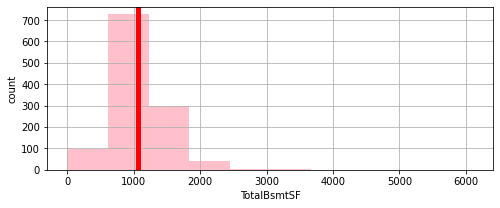

MATHEMATICAL SUMMARY OF TotalBsmtSF :
 count    1168.000000
mean     1061.095034
std       442.272249
min         0.000000
25%       799.000000
50%      1005.500000
75%      1291.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [31]:
L = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF" ]
for i in L:
    df_train2[i].hist(bins =10,figsize=(8,3), color ="pink")
    plt.axvline(np.mean(df_train2[i]), linewidth = 5, color = "red", label = "Mean (i)")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    print("MATHEMATICAL SUMMARY OF", i ,":\n",\
          df_train2[i].describe())

In [32]:
df_train2.columns

Index(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC'],
      dtype='object')

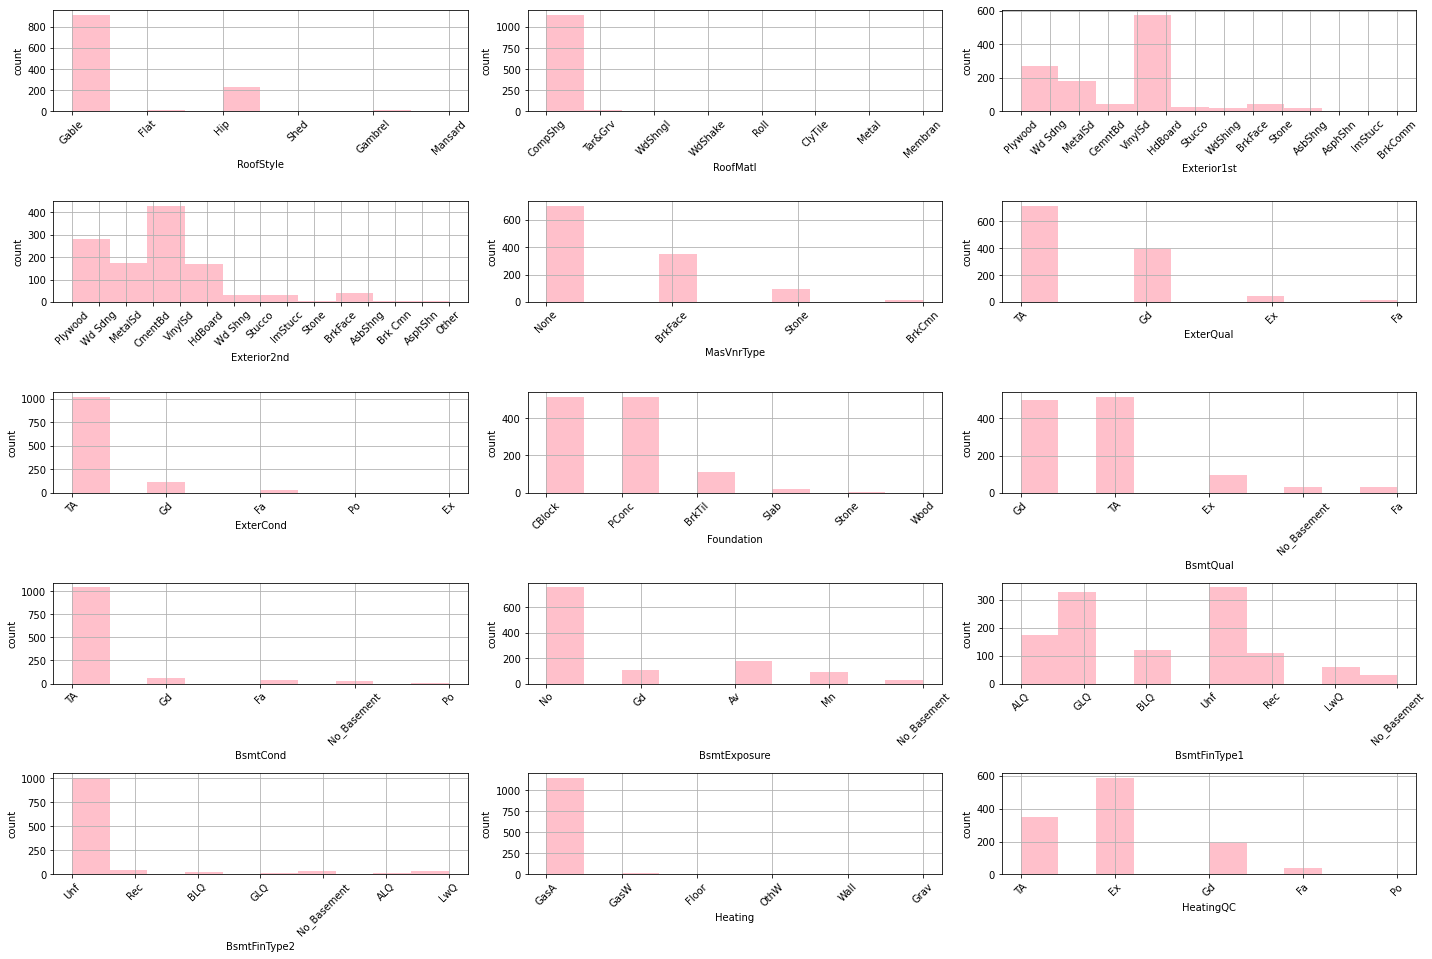

In [33]:
c = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC']

for i in range (0, len(c)):
    plt.subplot(6,3,i+1) 
    df_train2[c[i]].hist(bins =10,figsize=(20,15), color ="pink")
    plt.xlabel(c[i])
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.tight_layout()

### Key Observations:
1. Gable Roof type standard composite is high in number and exterior covering to house is Vinyl Siding and cement board.
2. Masonry veneer type is mostly none brick face, exterior quality and condition is mostly average/typical.
3. Cinder Block type foundation and basement quality is mostly good and condition is average/typical and basement mostly have no exposure.
4. basement finished type is mostly unfinished.
5. Gas forced warm air furnace heating type and Excellent in quality is high.

### Table 3

In [34]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CentralAir    1168 non-null   object
 1   Electrical    1168 non-null   object
 2   1stFlrSF      1168 non-null   int64 
 3   2ndFlrSF      1168 non-null   int64 
 4   LowQualFinSF  1168 non-null   int64 
 5   GrLivArea     1168 non-null   int64 
 6   BsmtFullBath  1168 non-null   int64 
 7   BsmtHalfBath  1168 non-null   int64 
 8   FullBath      1168 non-null   int64 
 9   HalfBath      1168 non-null   int64 
 10  BedroomAbvGr  1168 non-null   int64 
 11  KitchenAbvGr  1168 non-null   int64 
 12  KitchenQual   1168 non-null   object
 13  TotRmsAbvGrd  1168 non-null   int64 
 14  Functional    1168 non-null   object
 15  Fireplaces    1168 non-null   int64 
 16  FireplaceQu   1168 non-null   object
 17  GarageType    1168 non-null   object
 18  GarageYrBlt   1168 non-null   object
 19  Garage

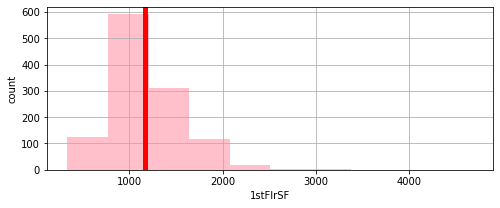

MATHEMATICAL SUMMARY OF 1stFlrSF :
 count    1168.000000
mean     1169.860445
std       391.161983
min       334.000000
25%       892.000000
50%      1096.500000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64


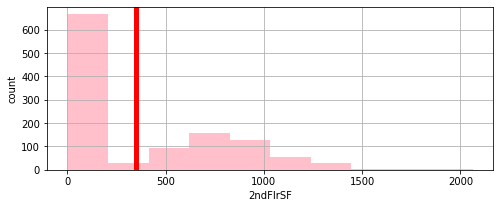

MATHEMATICAL SUMMARY OF 2ndFlrSF :
 count    1168.000000
mean      348.826199
std       439.696370
min         0.000000
25%         0.000000
50%         0.000000
75%       729.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


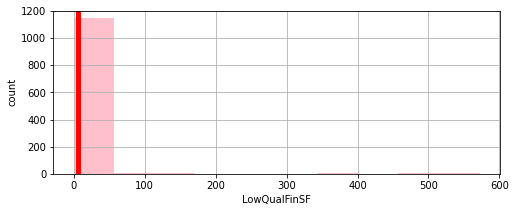

MATHEMATICAL SUMMARY OF LowQualFinSF :
 count    1168.000000
mean        6.380137
std        50.892844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


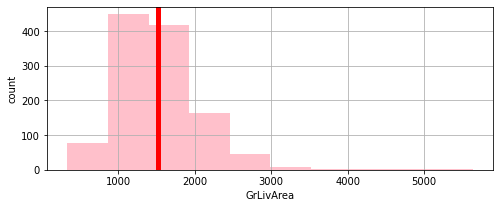

MATHEMATICAL SUMMARY OF GrLivArea :
 count    1168.000000
mean     1525.066781
std       528.042957
min       334.000000
25%      1143.250000
50%      1468.500000
75%      1795.000000
max      5642.000000
Name: GrLivArea, dtype: float64


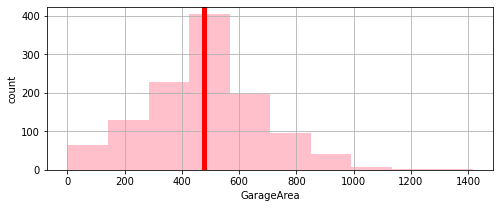

MATHEMATICAL SUMMARY OF GarageArea :
 count    1168.000000
mean      476.860445
std       214.466769
min         0.000000
25%       338.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


In [35]:
L = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea']

for i in L:
    df_train3[i].hist(bins =10,figsize=(8,3), color ="pink")
    plt.axvline(np.mean(df_train3[i]), linewidth = 5, color = "red", label = "Mean (i)")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    print("MATHEMATICAL SUMMARY OF", i ,":\n",\
          df_train3[i].describe())

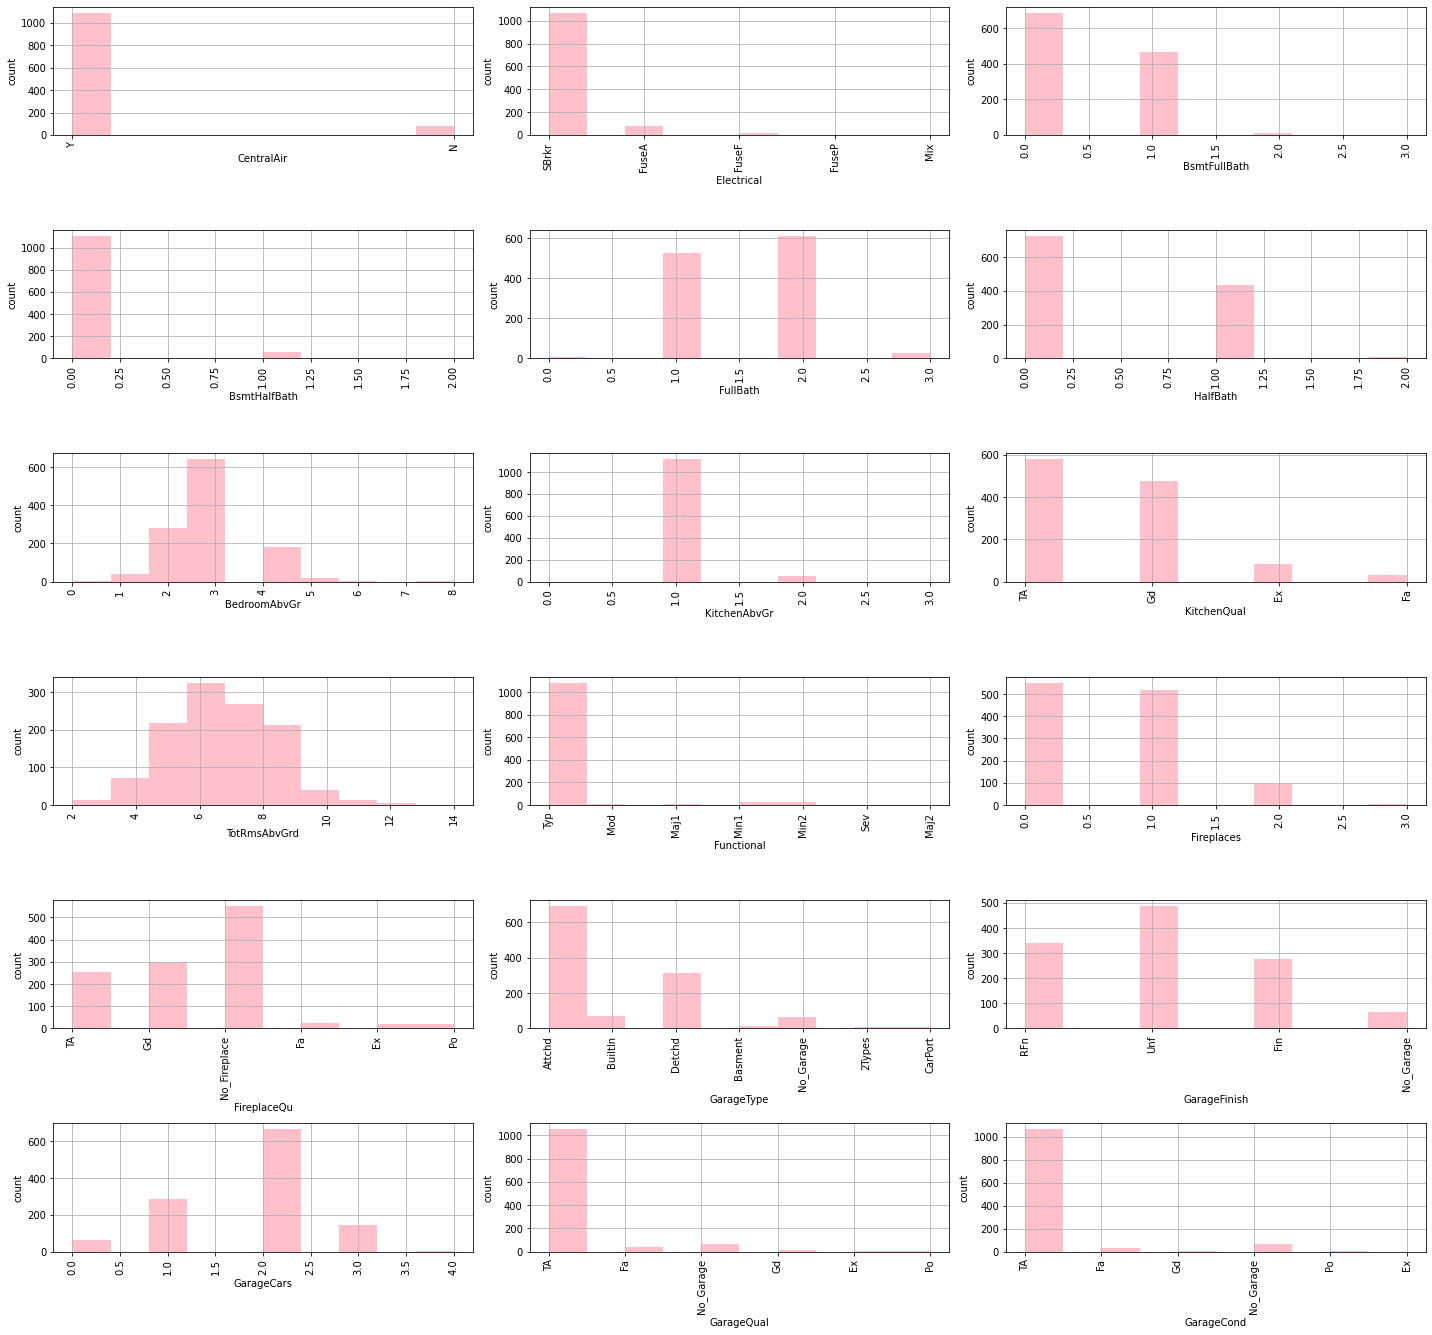

In [36]:
c = ['CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

for i in range (0, len(c)):
    plt.subplot(10,3,i+1) 
    df_train3[c[i]].hist(bins =10,figsize=(20,30), color ="pink")
    plt.xlabel(c[i])
    plt.ylabel("count")
    plt.xticks(rotation=90)
    plt.tight_layout()

### Key Observations:
1. Property mostly have central air conditioning with mostly electrical system of Standard Circuit Breakers & Romex 
2. Kitchen Quality is mostly Typical/Average. home functionality is mostly Typical Functionality and fire place is between 0-1.
3. Garage type is attached and mostly unfinished 2 cars parking quality and condition is Typical/Average.

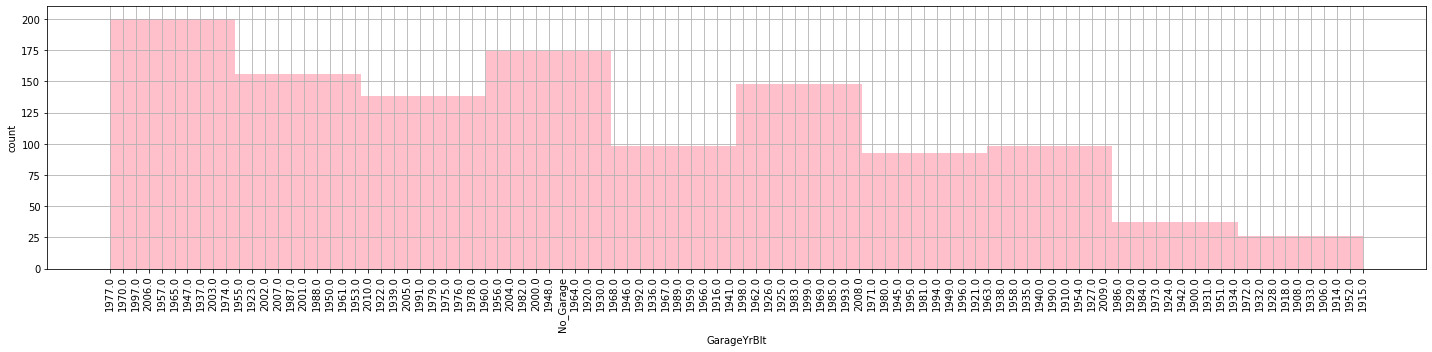

In [37]:
df_train3['GarageYrBlt'].hist(bins =10,figsize=(20,5), color ="pink")
plt.xlabel('GarageYrBlt')
plt.ylabel("count")
plt.xticks(rotation=90)
plt.tight_layout()

### Key Observation:
1. Properties out for sale are mostly built in year 1977, 1970. 1997, 2006, 1957, 1965, 1947, 1937, 2003, 1974..
which means from 1945 to 2006 in all frequency we have properties largely out for sale.

### Tabel 4

In [38]:
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PavedDrive     1168 non-null   object
 1   WoodDeckSF     1168 non-null   int64 
 2   OpenPorchSF    1168 non-null   int64 
 3   EnclosedPorch  1168 non-null   int64 
 4   3SsnPorch      1168 non-null   int64 
 5   ScreenPorch    1168 non-null   int64 
 6   PoolArea       1168 non-null   int64 
 7   PoolQC         1168 non-null   object
 8   Fence          1168 non-null   object
 9   MiscFeature    1168 non-null   object
 10  MiscVal        1168 non-null   int64 
 11  MoSold         1168 non-null   int64 
 12  YrSold         1168 non-null   int64 
 13  SaleType       1168 non-null   object
 14  SaleCondition  1168 non-null   object
dtypes: int64(9), object(6)
memory usage: 137.0+ KB


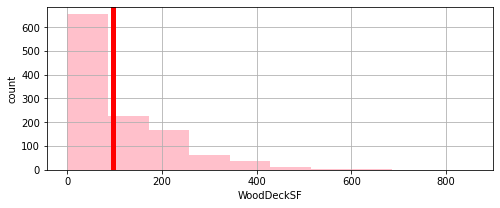

MATHEMATICAL SUMMARY OF WoodDeckSF :
 count    1168.000000
mean       96.206336
std       126.158988
min         0.000000
25%         0.000000
50%         0.000000
75%       171.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


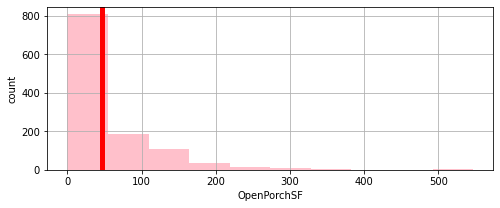

MATHEMATICAL SUMMARY OF OpenPorchSF :
 count    1168.000000
mean       46.559932
std        66.381023
min         0.000000
25%         0.000000
50%        24.000000
75%        70.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


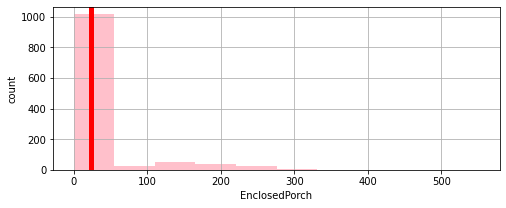

MATHEMATICAL SUMMARY OF EnclosedPorch :
 count    1168.000000
mean       23.015411
std        63.191089
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


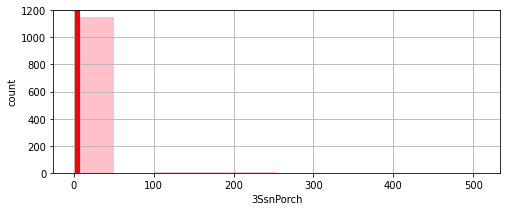

MATHEMATICAL SUMMARY OF 3SsnPorch :
 count    1168.000000
mean        3.639555
std        29.088867
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


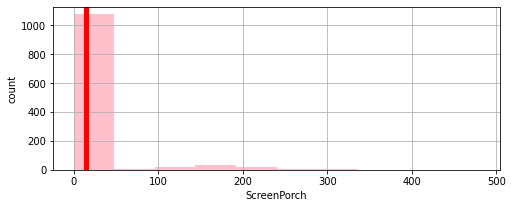

MATHEMATICAL SUMMARY OF ScreenPorch :
 count    1168.000000
mean       15.051370
std        55.080816
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


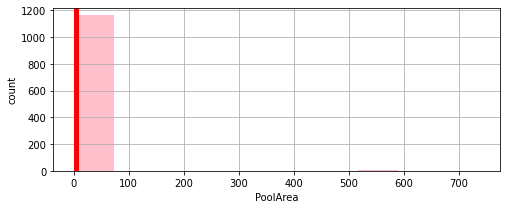

MATHEMATICAL SUMMARY OF PoolArea :
 count    1168.000000
mean        3.448630
std        44.896939
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


In [39]:
L = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea']

for i in L:
    df_train4[i].hist(bins =10,figsize=(8,3), color ="pink")
    plt.axvline(np.mean(df_train4[i]), linewidth = 5, color = "red", label = "Mean (i)")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    print("MATHEMATICAL SUMMARY OF", i ,":\n",\
          df_train4[i].describe())

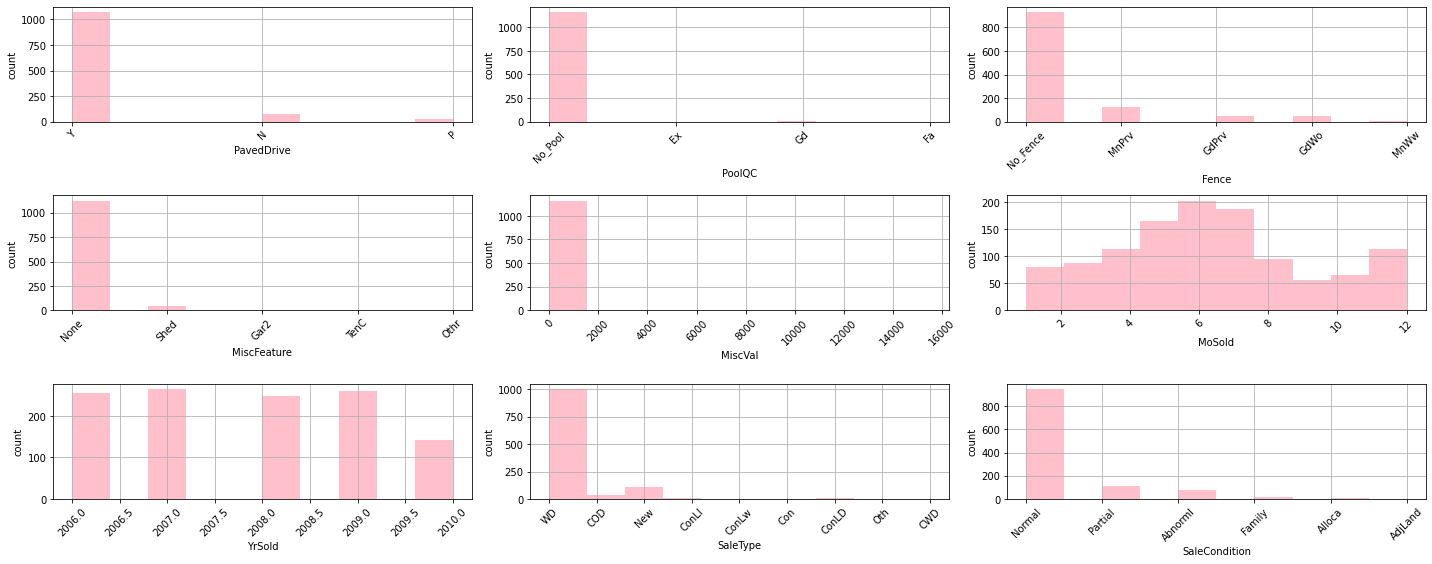

In [40]:
c = ['PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

for i in range (0, len(c)):
    plt.subplot(6,3,i+1) 
    df_train4[c[i]].hist(bins =10,figsize=(20,15), color ="pink")
    plt.xlabel(c[i])
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.tight_layout()

### Key Observations:
1. Paved driveway is mostly Paved 
2. Sales type is Warranty Deed - Conventional condition is normal year sold is mostly 2007 with no fence and no pool.

### Target Table

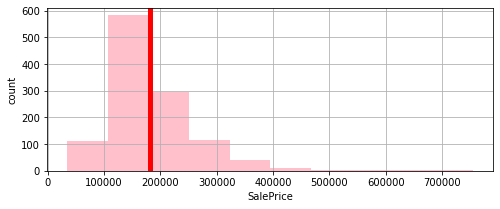

MATHEMATICAL SUMMARY OF VOTES :
 count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [41]:
L = ['SalePrice']

for i in L:
    df_train[i].hist(bins =10,figsize=(8,3), color ="pink")
    plt.axvline(np.mean(df_train[i]), linewidth = 5, color = "red", label = "Mean (i)")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    print("MATHEMATICAL SUMMARY OF VOTES :\n",\
          df_train[i].describe())

### Bivariate analysis.

> We will have target variable as second variate and lets analysis the feature variables.

##### Table 1

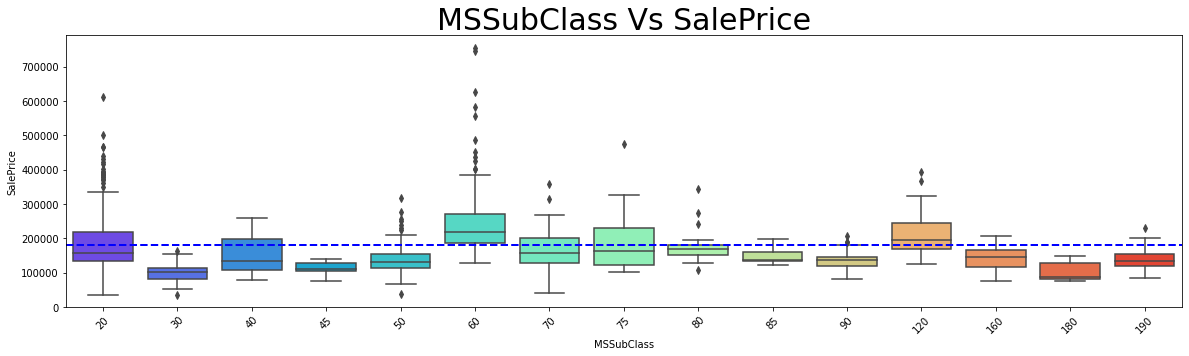

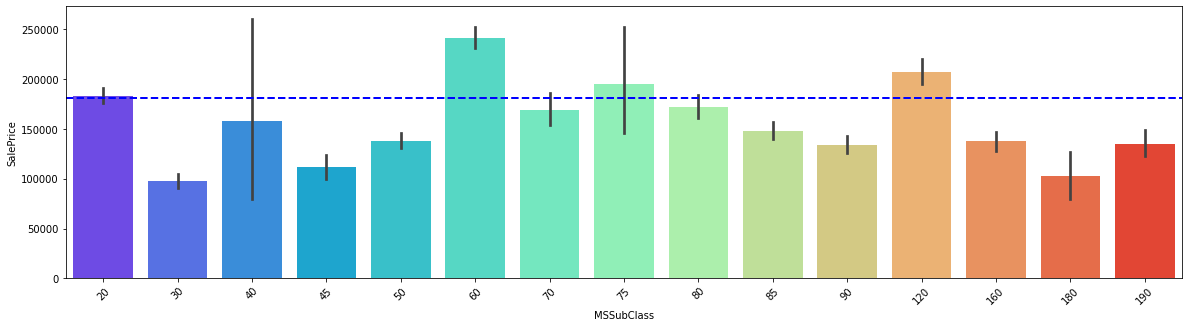

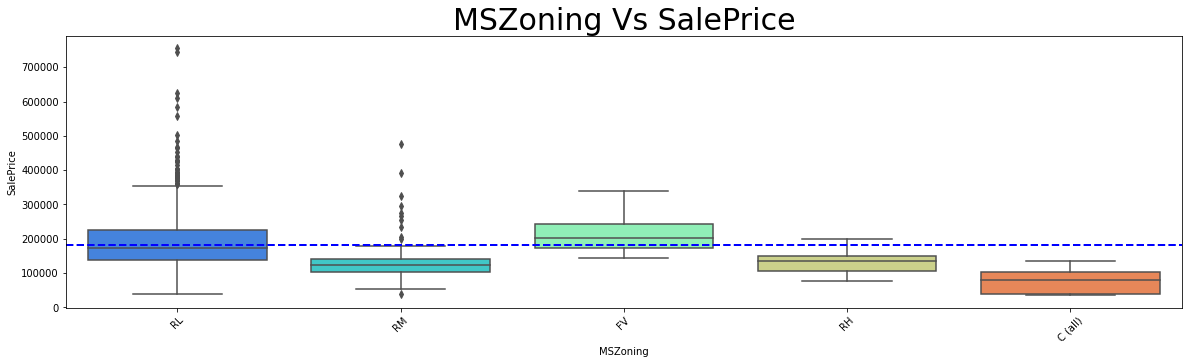

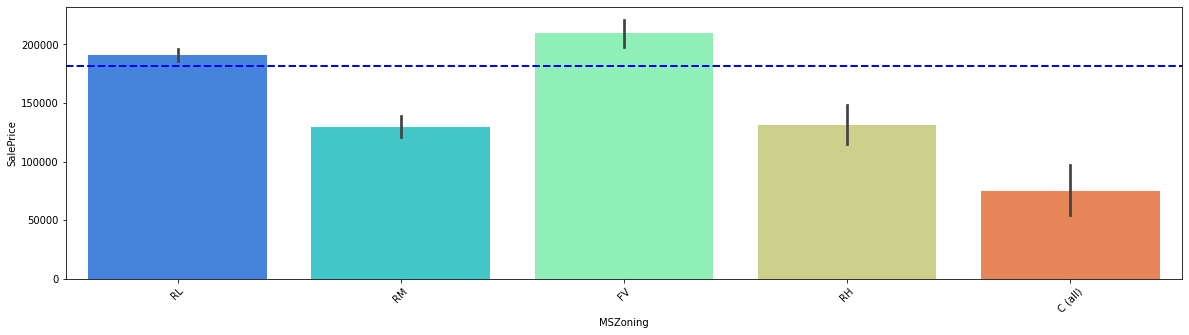

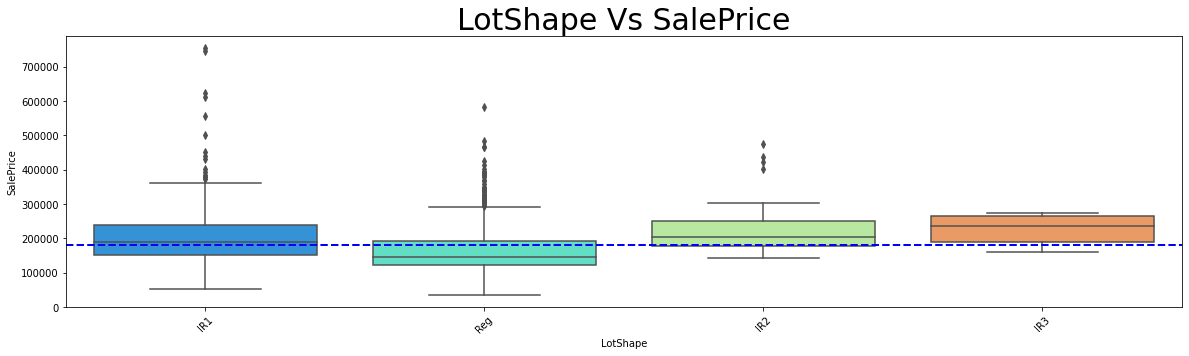

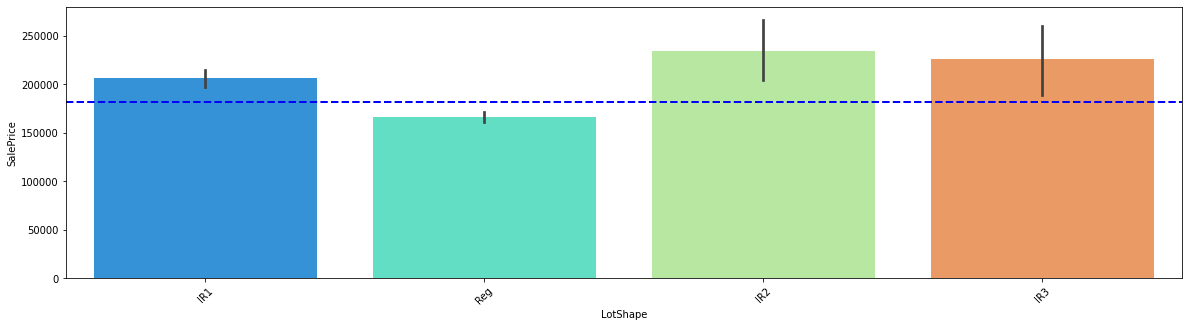

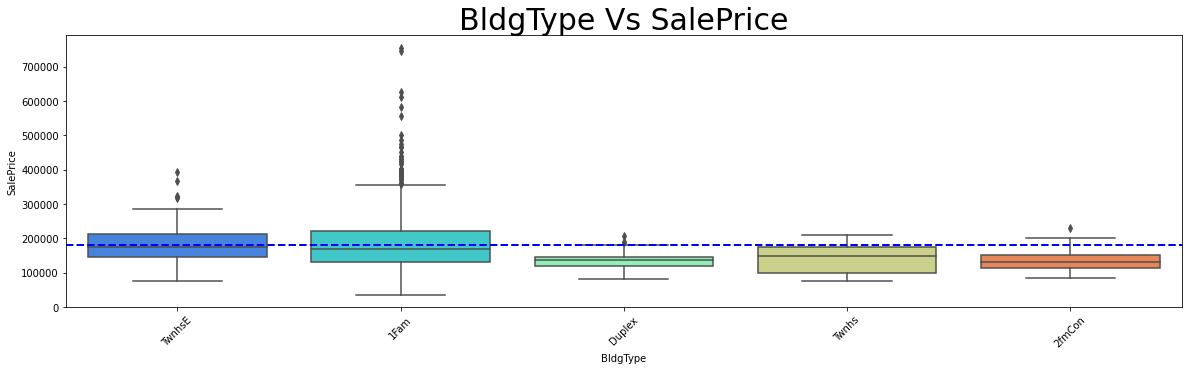

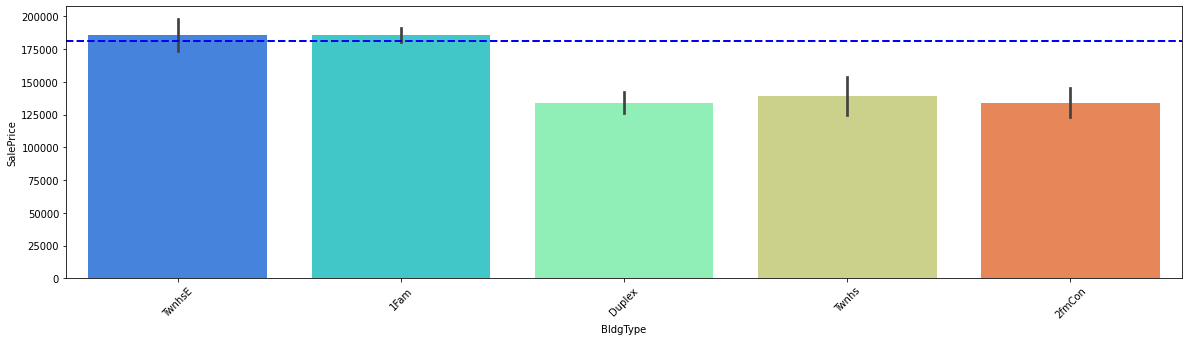

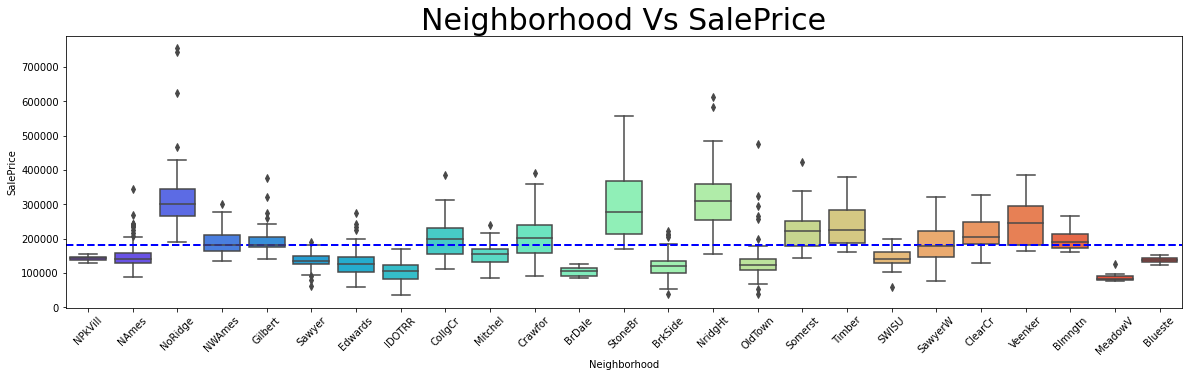

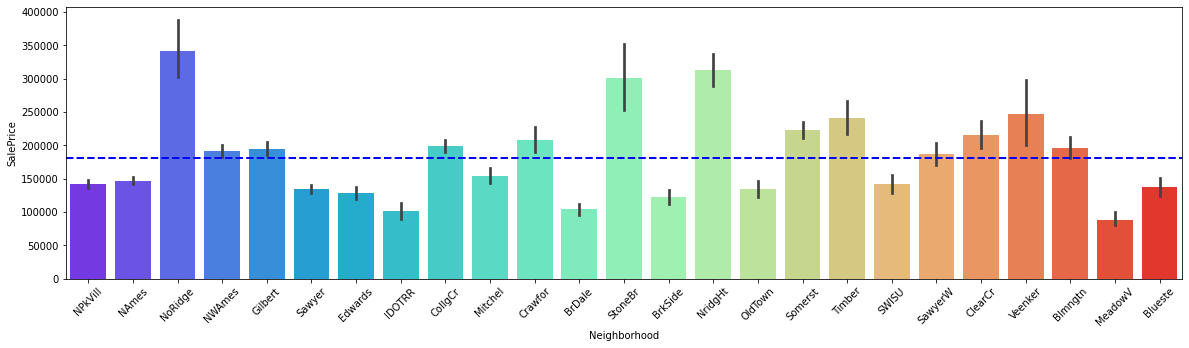

In [42]:
DF = df_train1.join(df_Target)
coll = ['MSSubClass', 'MSZoning', 'LotShape', 'BldgType', 'Neighborhood']


for i in coll:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(DF.SalePrice)
    sns.boxplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{i} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(20,5))
    sns.barplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.xticks(rotation=45)
    plt.show()

### Key Observation:
1. 2-STORY 1946 & NEWER is costlier in MSSubclass, Residential Low Density is costlier in MsZoning, Slightly irregular is costlier in LotShape.
2. Single Family is costlier in Building Type and Northridge is closire in Neibhorhood place.

##### Table 2

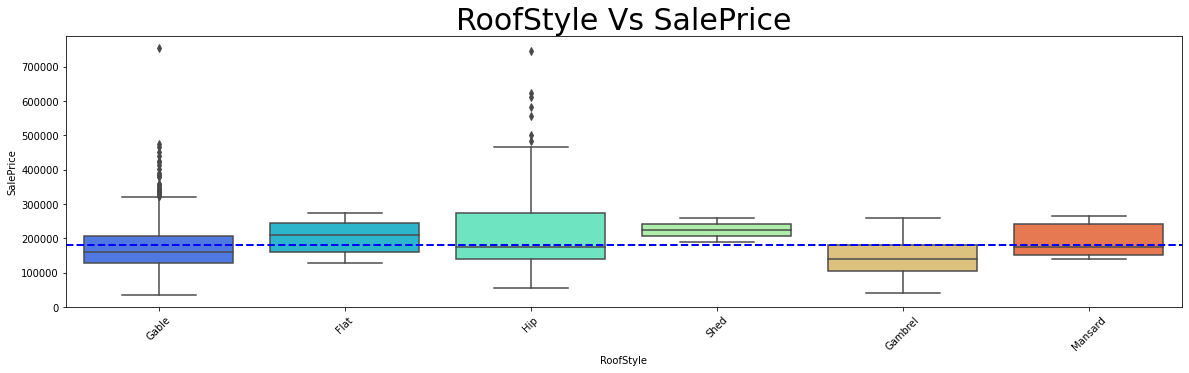

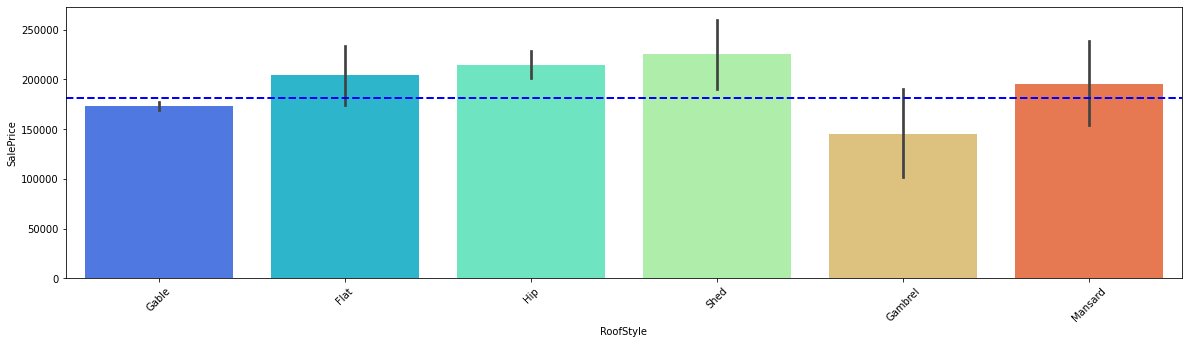

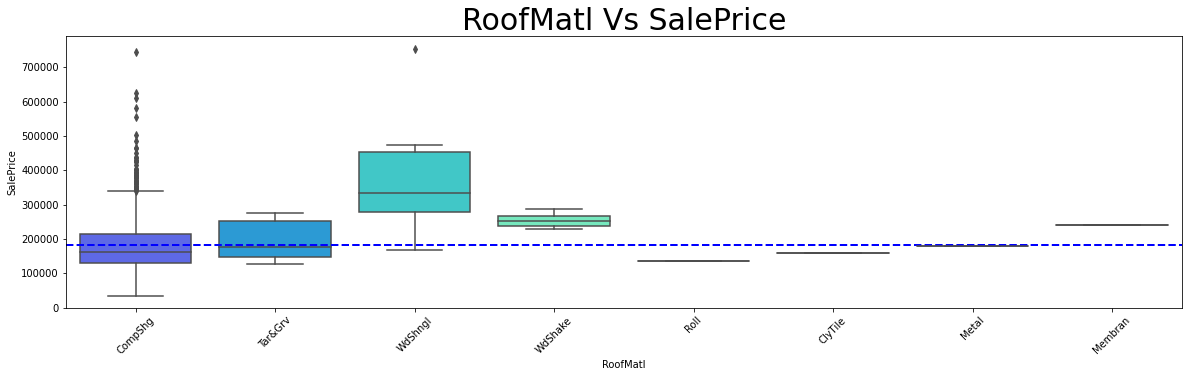

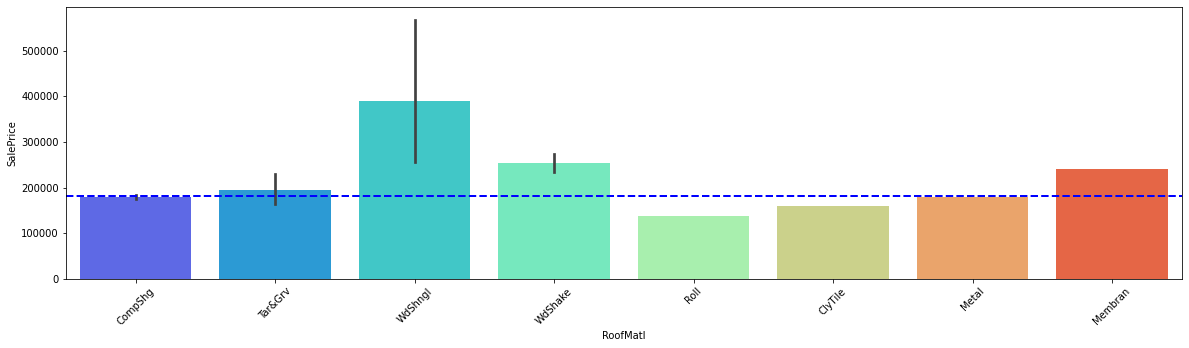

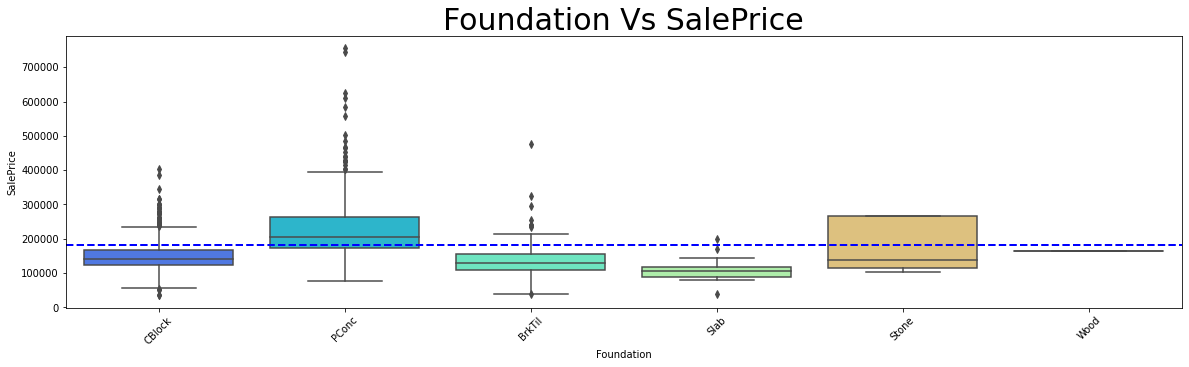

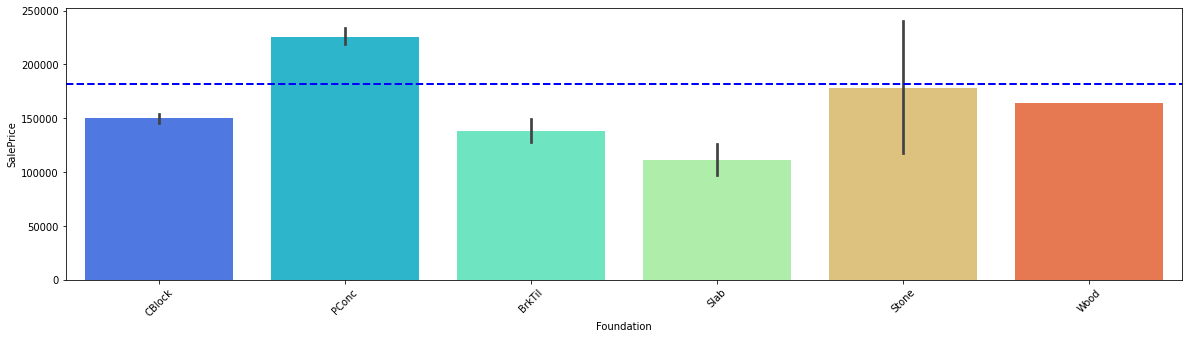

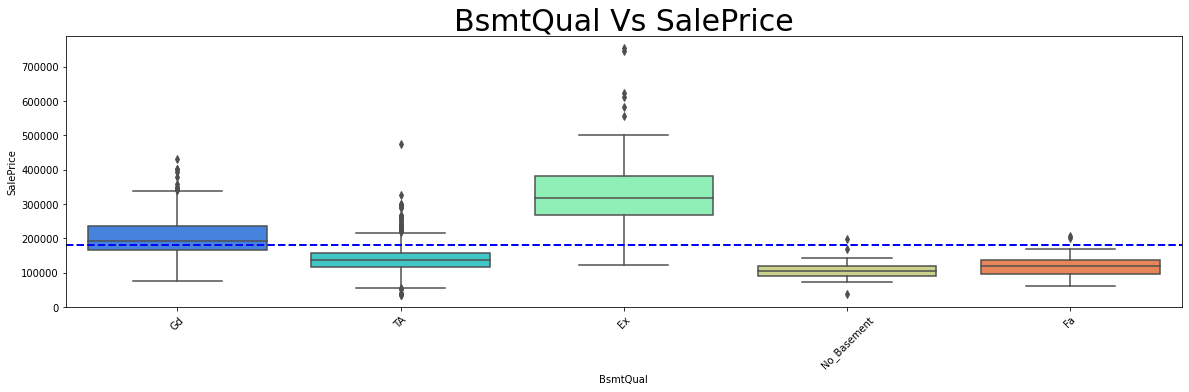

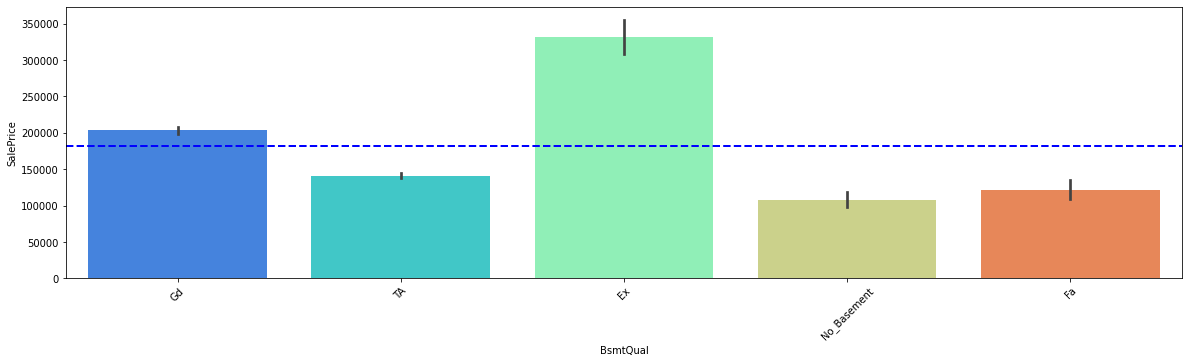

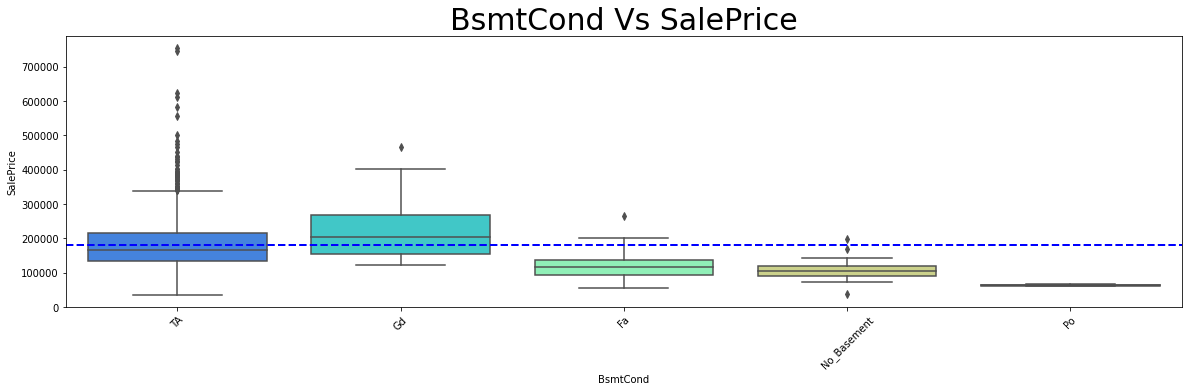

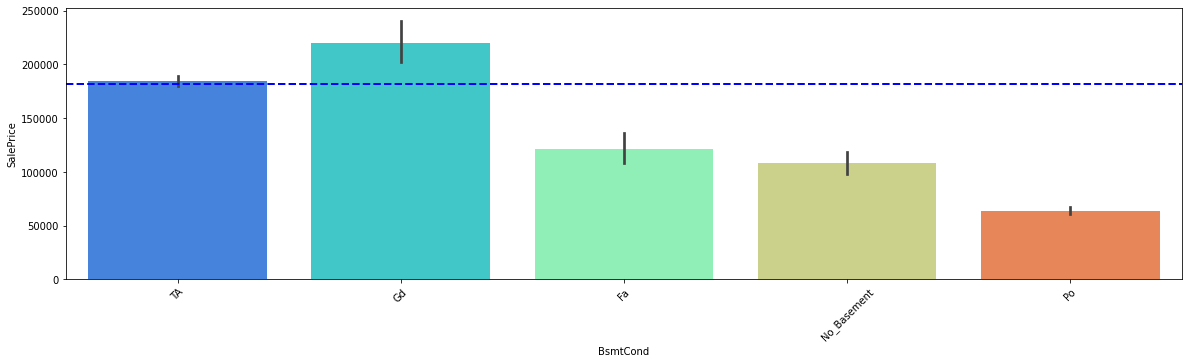

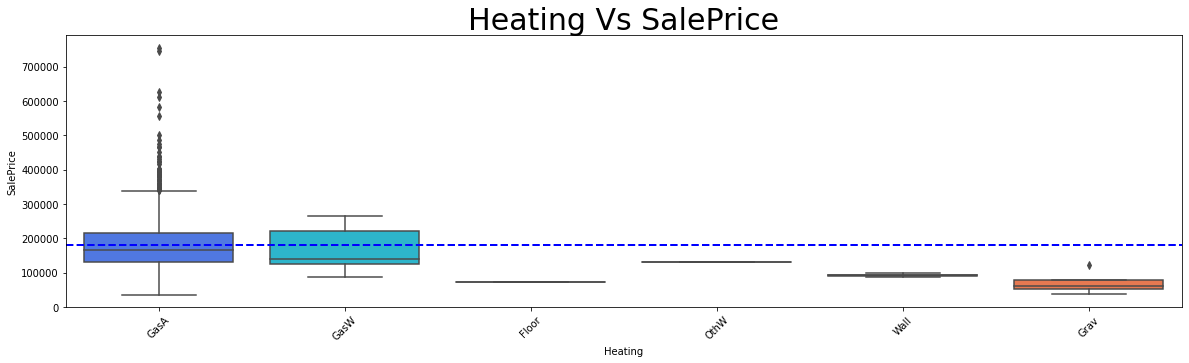

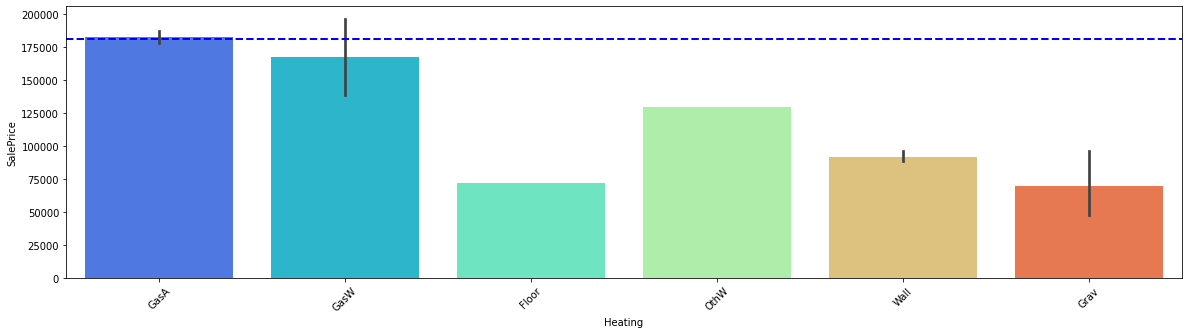

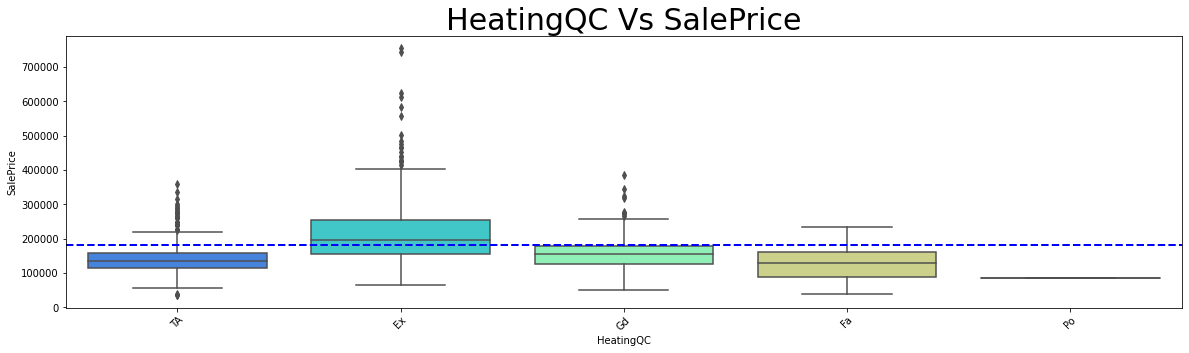

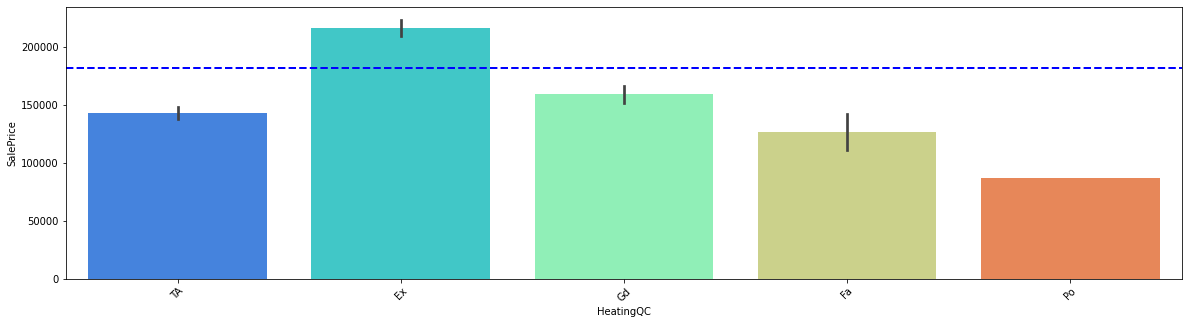

In [43]:
DF = df_train2.join(df_Target)
coll = ['RoofStyle', 'RoofMatl','Foundation', 'BsmtQual',
       'BsmtCond','Heating', 'HeatingQC']


for i in coll:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(DF.SalePrice)
    sns.boxplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{i} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(20,5))
    sns.barplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.xticks(rotation=45)
    plt.show()

### Key Observations:
1. Gable Roofing with Standard (Composite) Shingle material is costlier comparatively.
2. Poured Contrete	Foundation and Excellent Basement Quality and with condition Typical - slight dampness property is costlier
3. Excellent heating Quality in Gas forced warm air furnace and Gas hot water or steam heat is higher.

##### Table 3

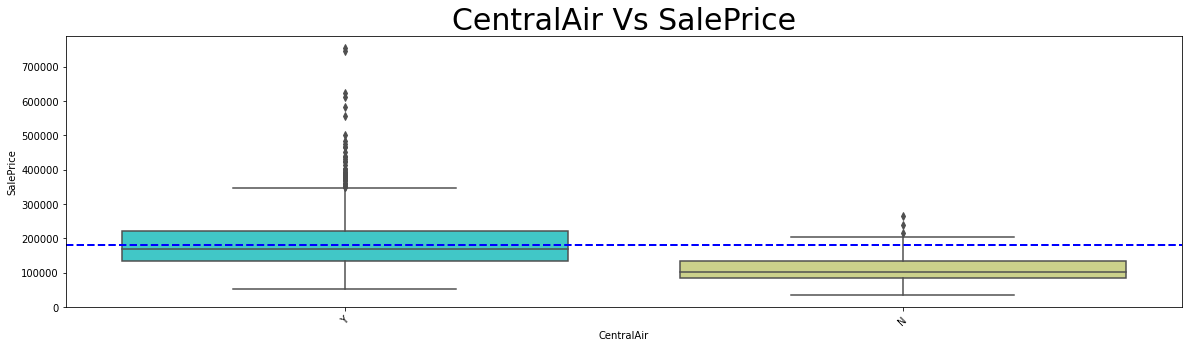

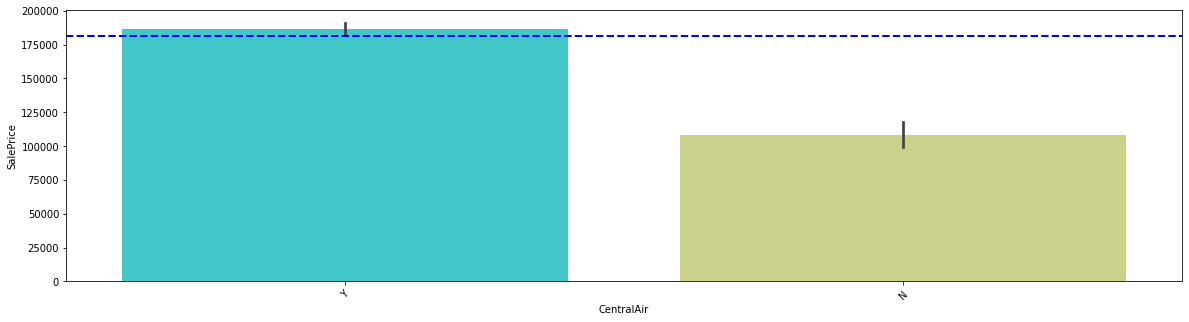

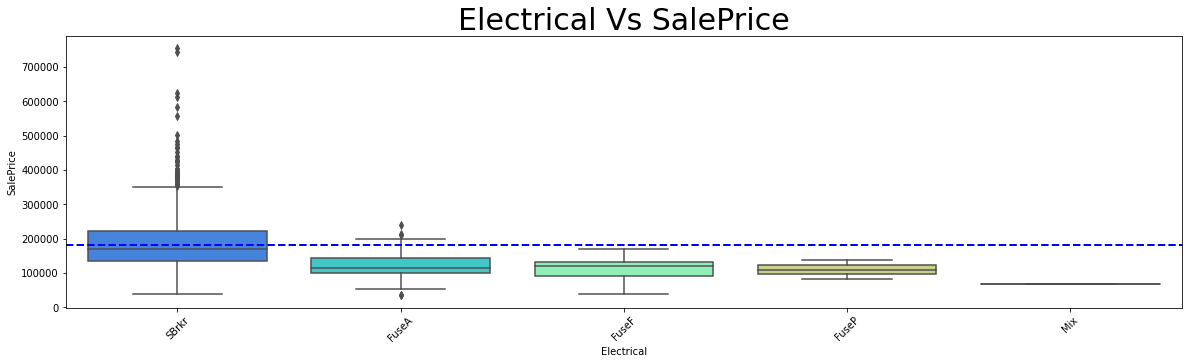

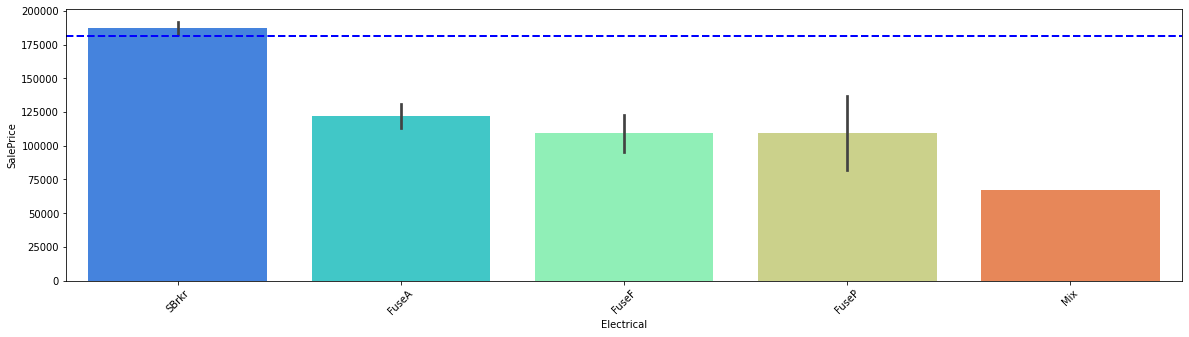

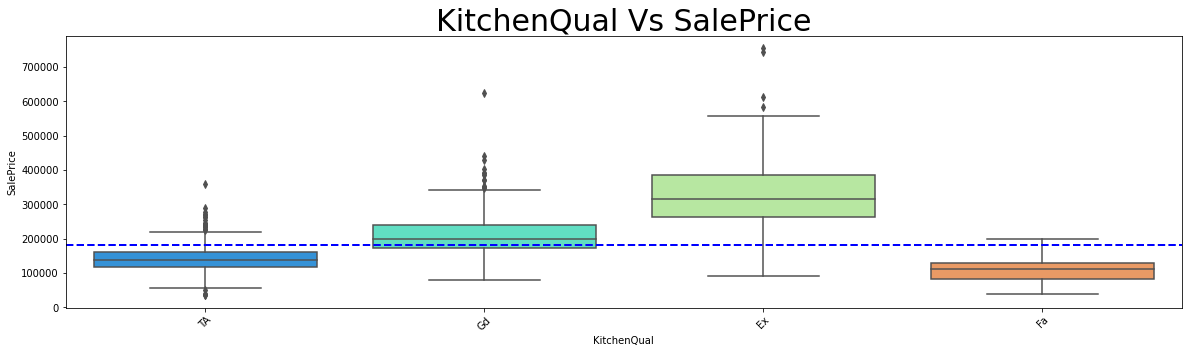

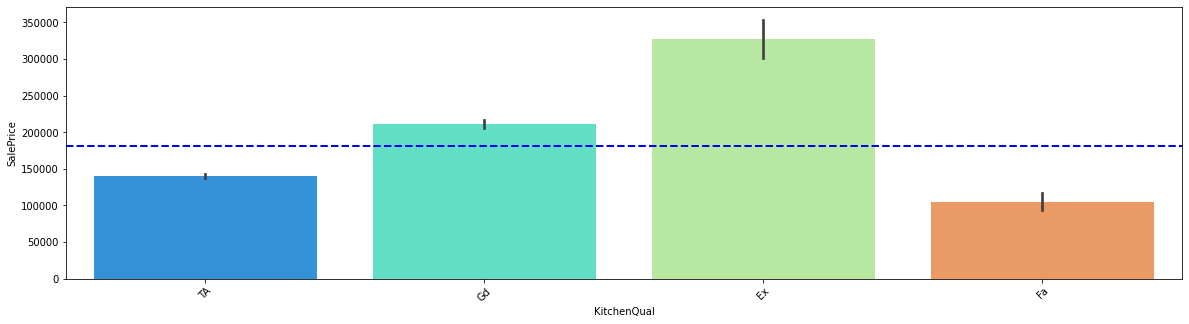

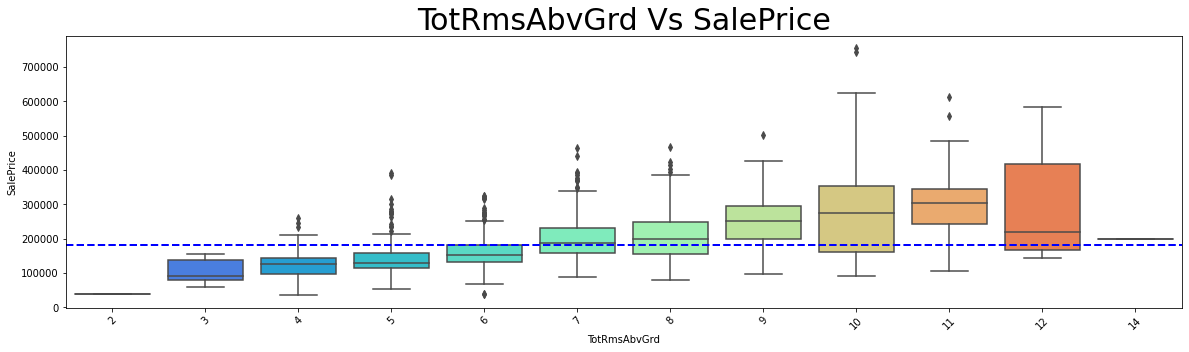

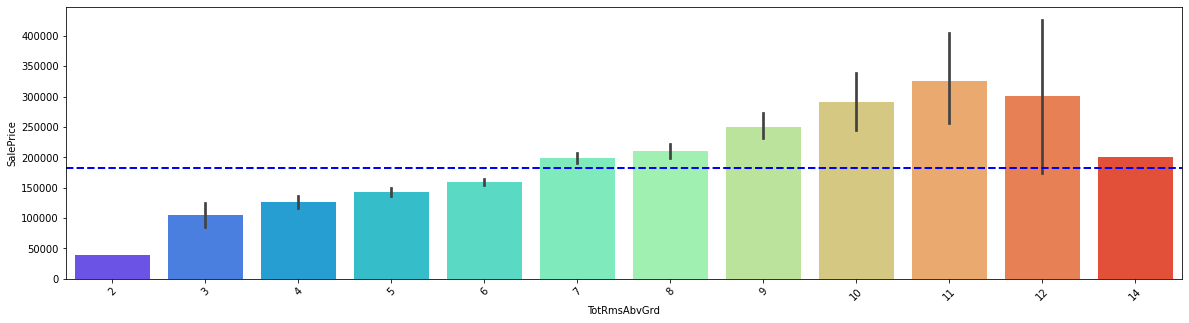

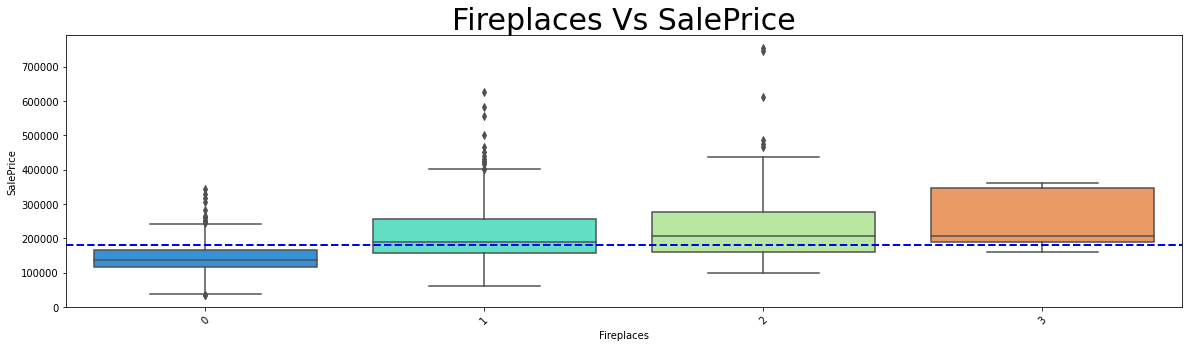

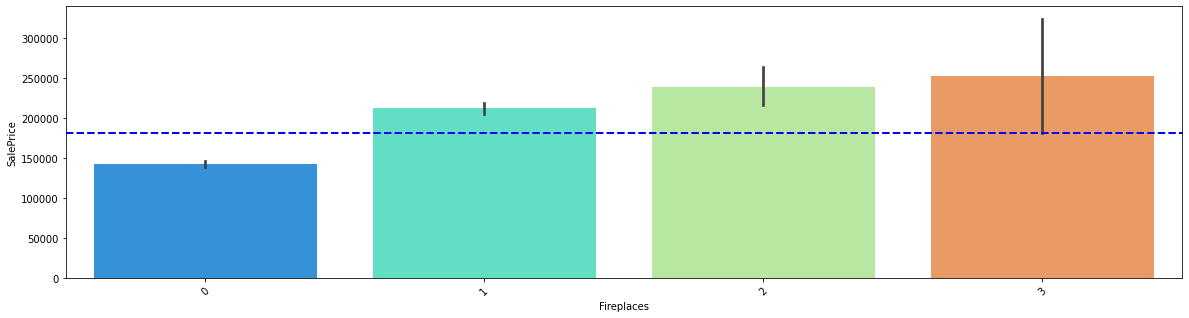

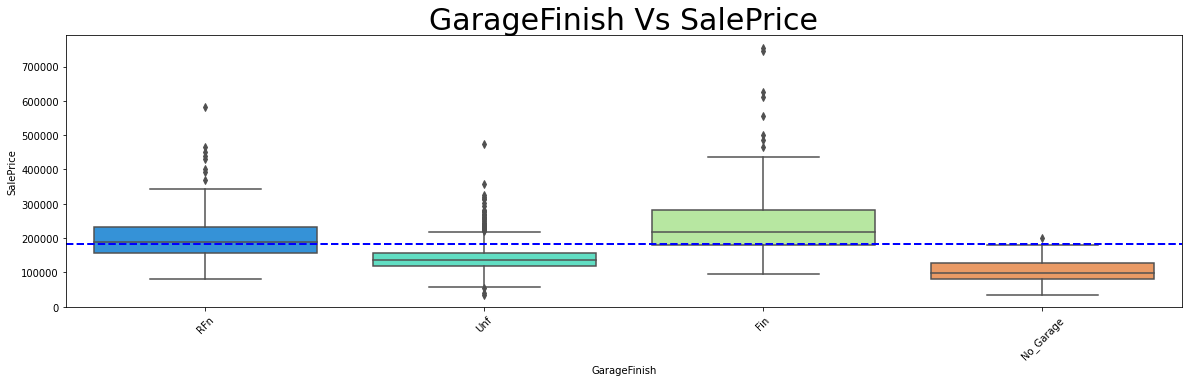

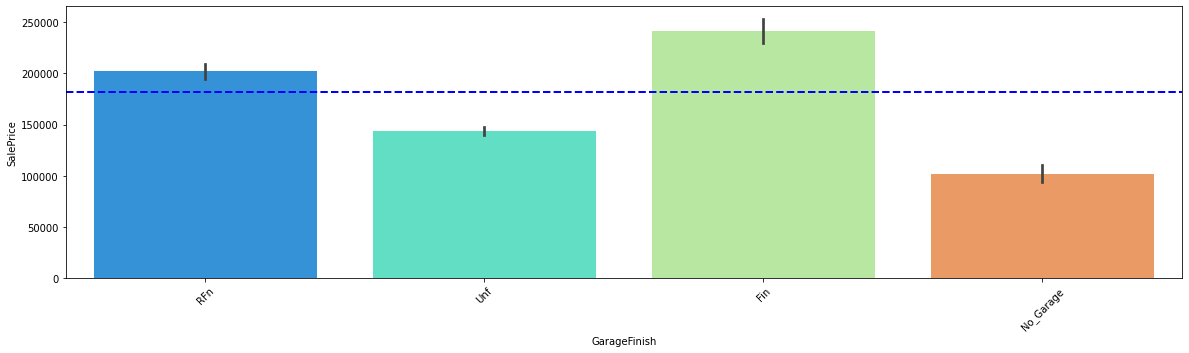

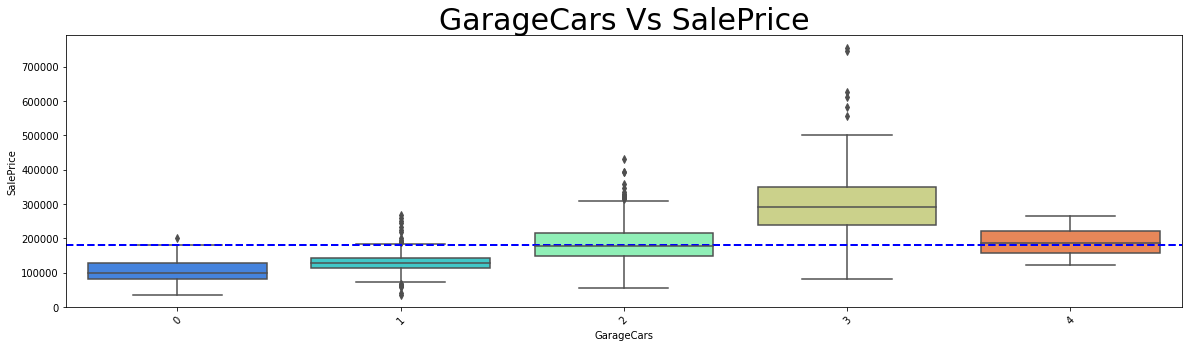

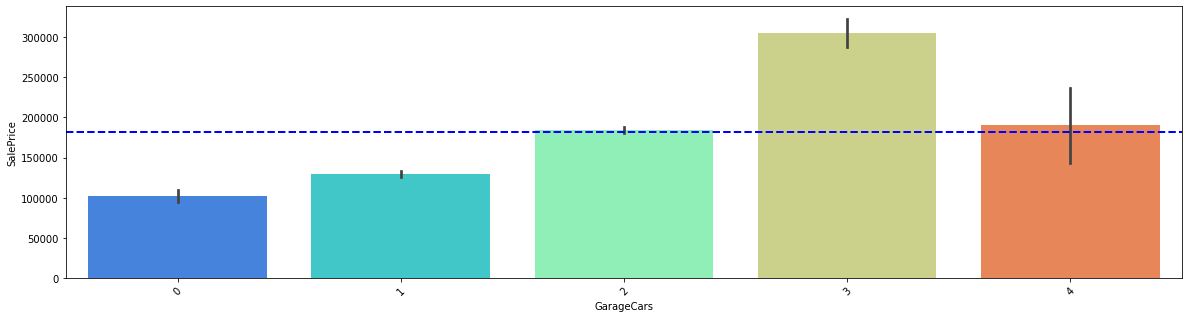

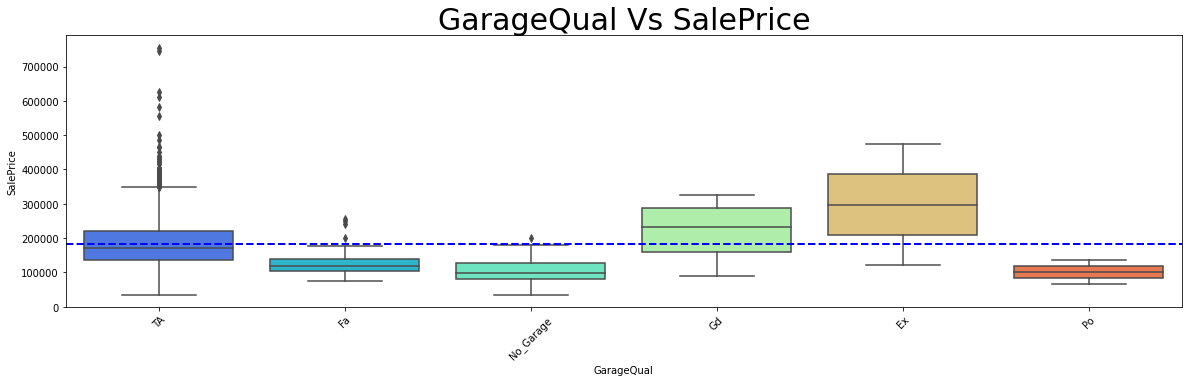

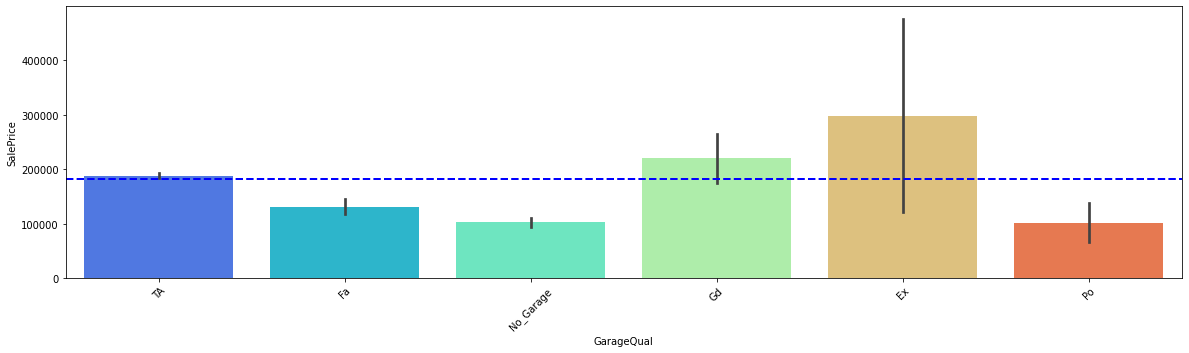

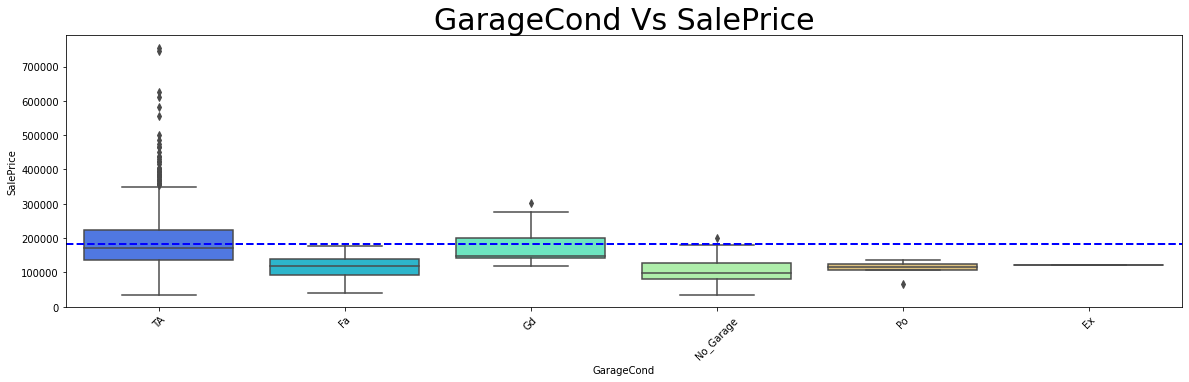

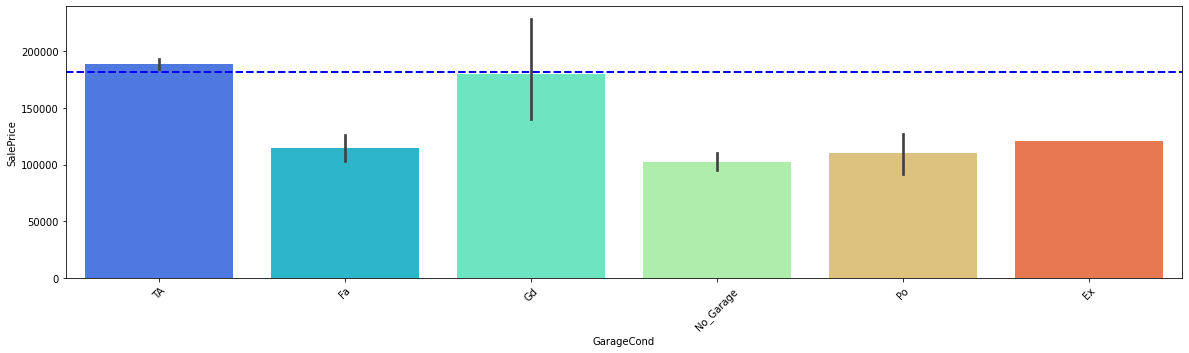

In [44]:
DF = df_train3.join(df_Target)
coll = ['CentralAir', 'Electrical','KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars',
         'GarageQual', 'GarageCond']


for i in coll:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(DF.SalePrice)
    sns.boxplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{i} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(20,5))
    sns.barplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.xticks(rotation=45)
    plt.show()

### Key Observations:
1. Central Air conditioned property with Standard Circuit Breakers & Romex and excellent kitchen Quality with max of 11 rooms house is costlier
2. Three Fire place and good garage with # cars parking area is costlier

##### Table 4

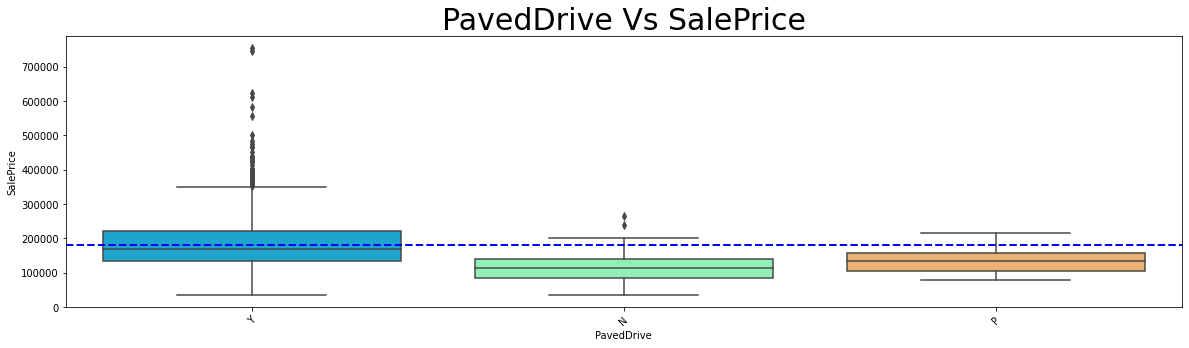

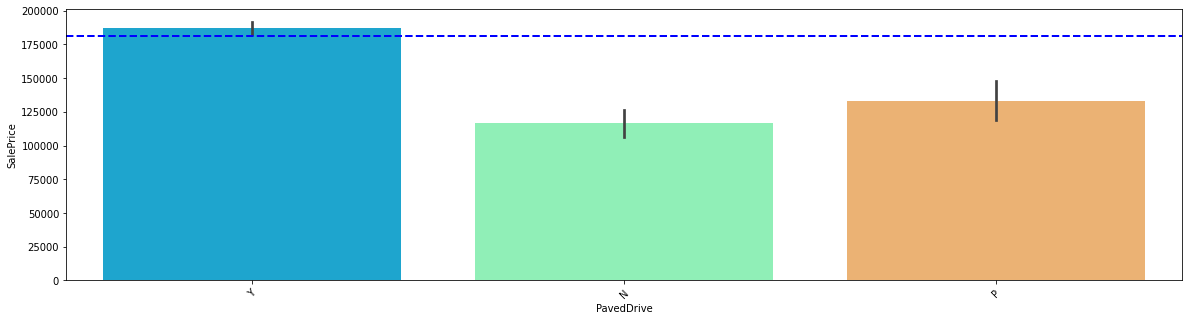

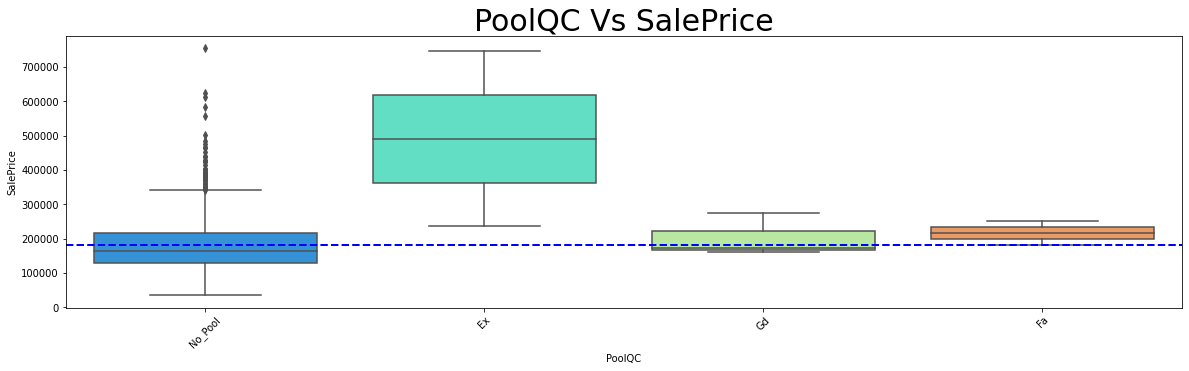

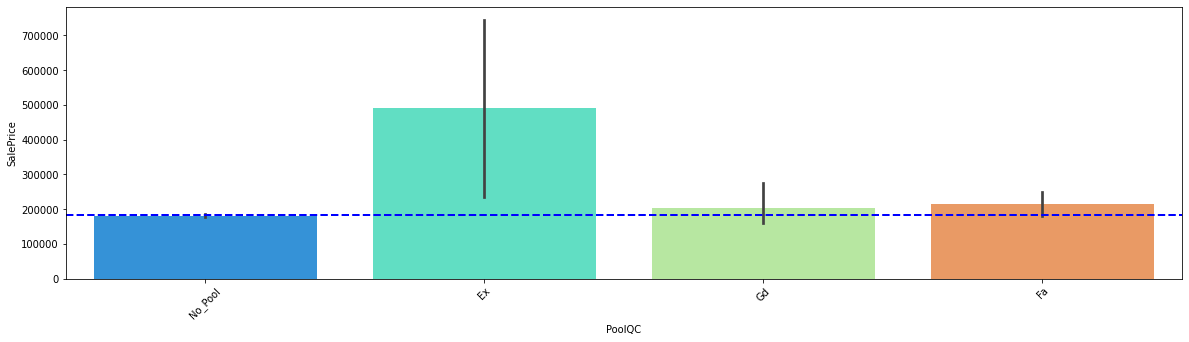

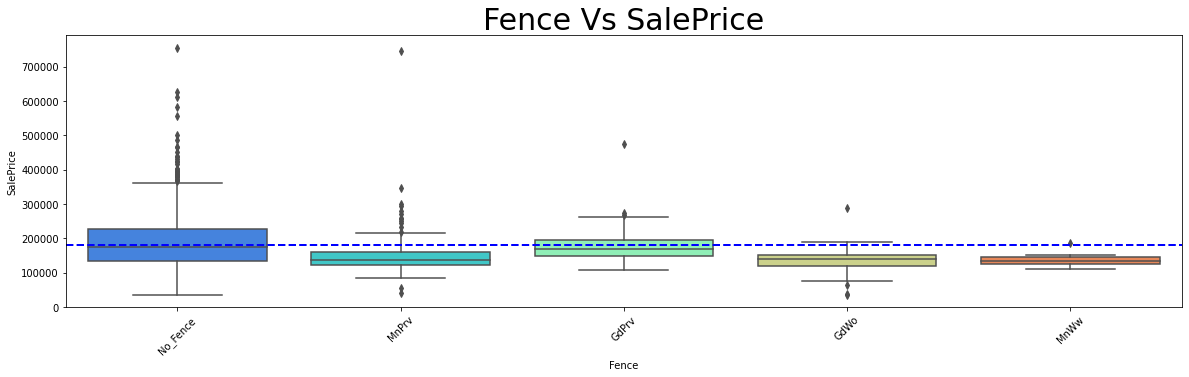

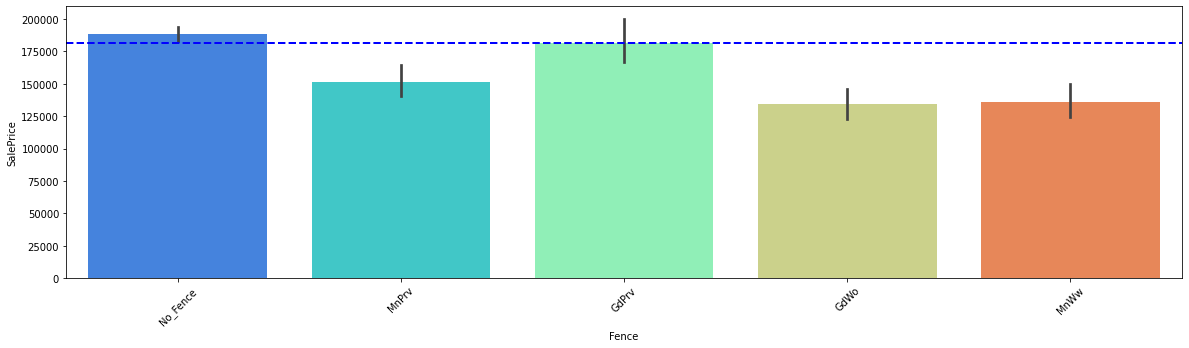

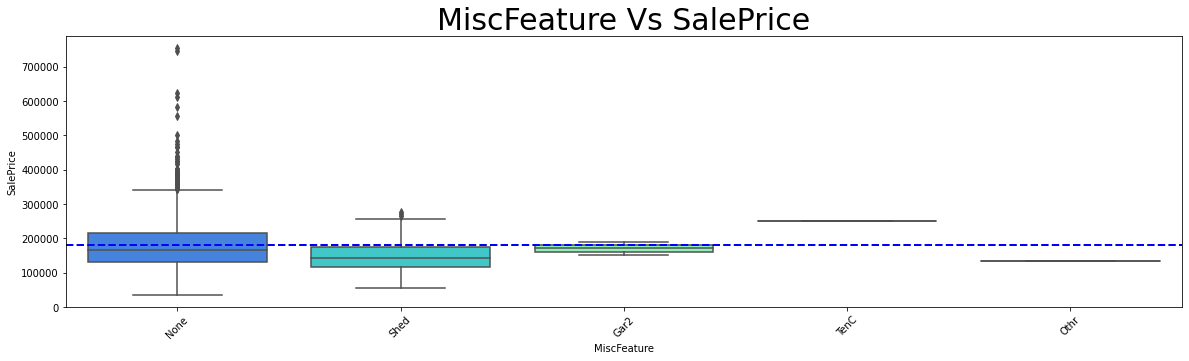

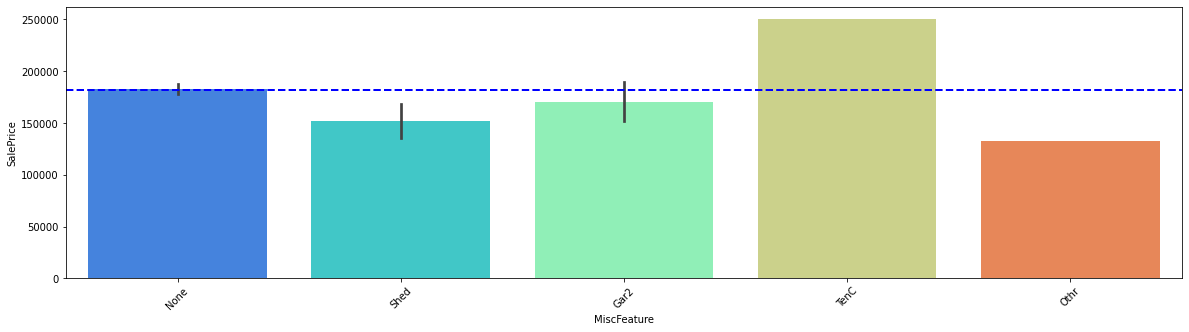

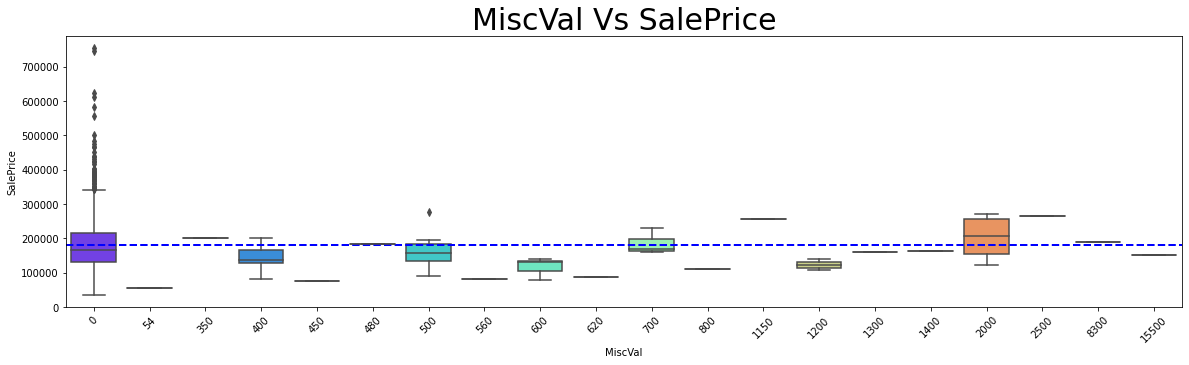

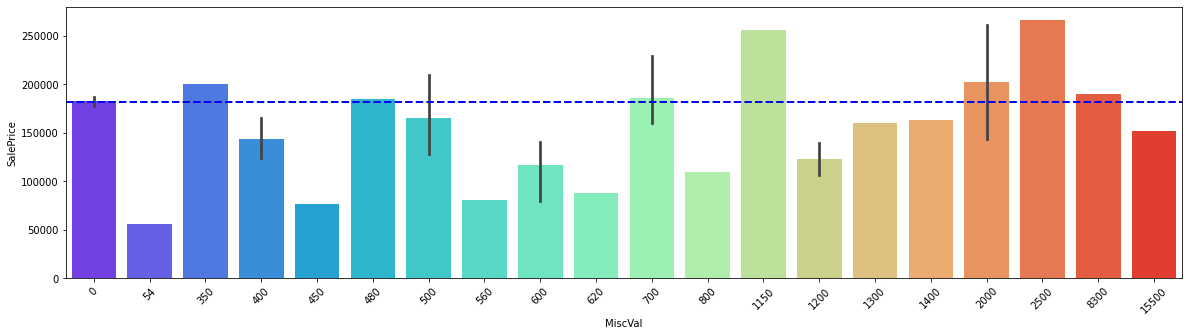

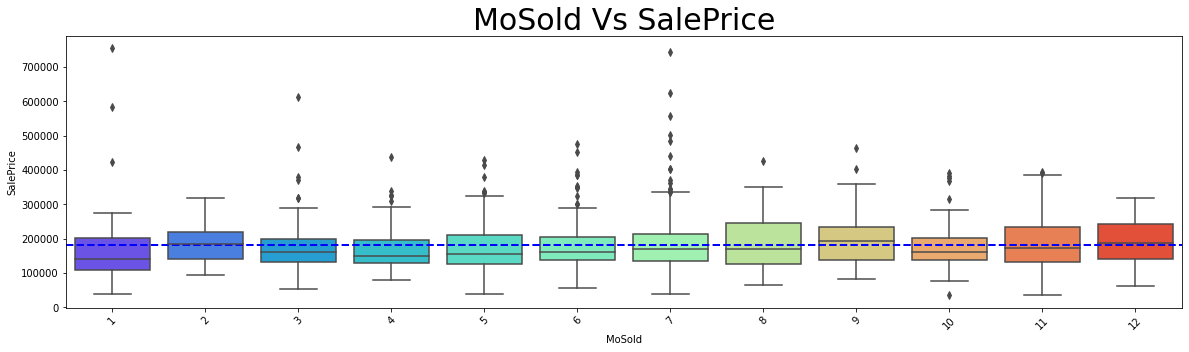

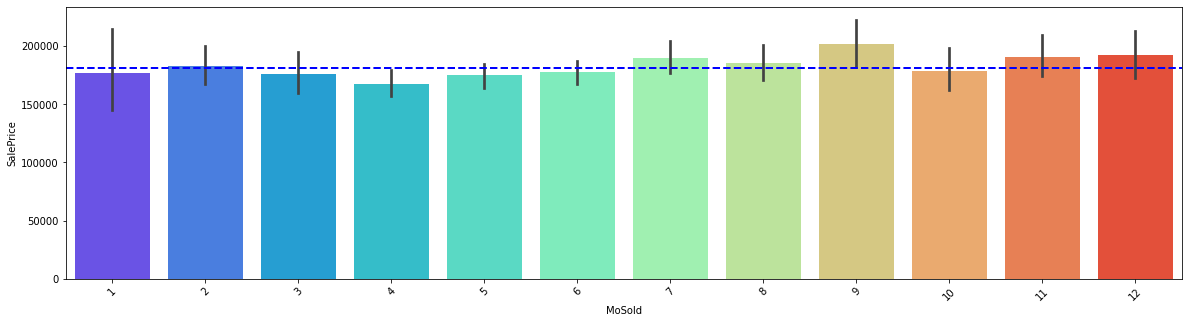

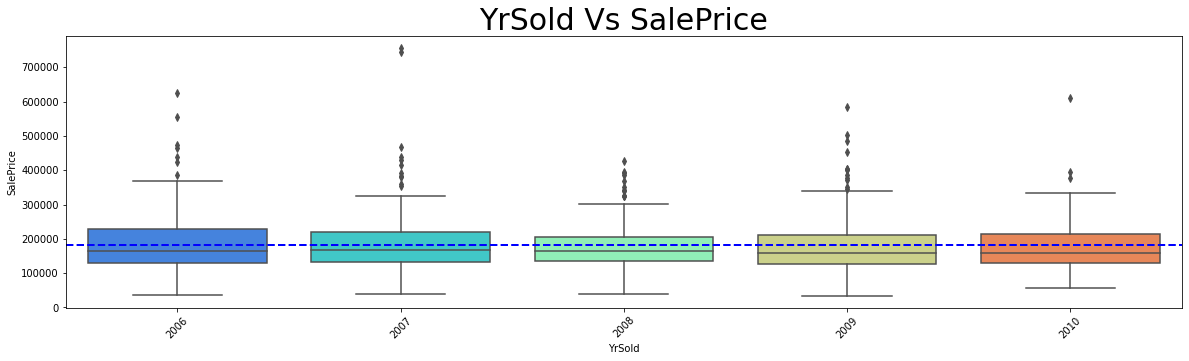

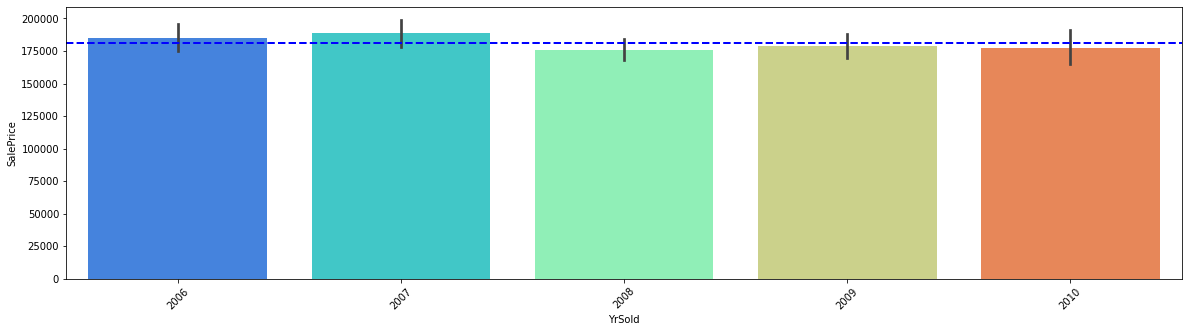

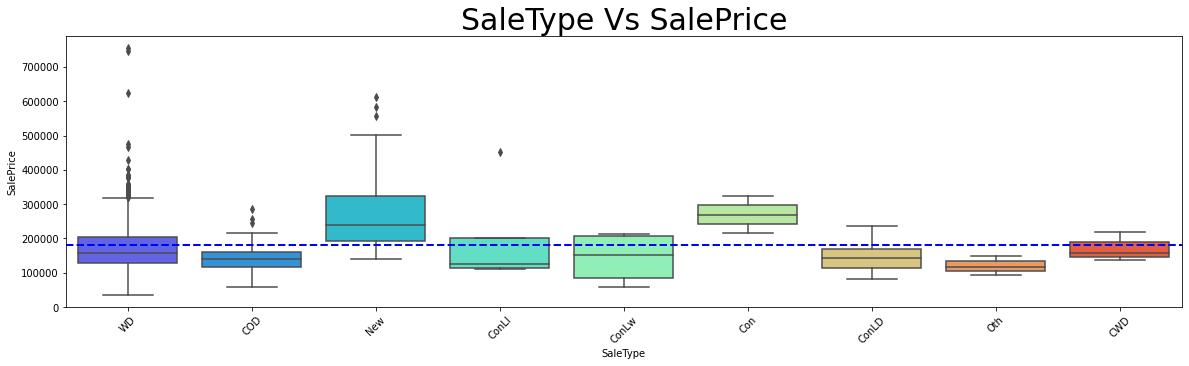

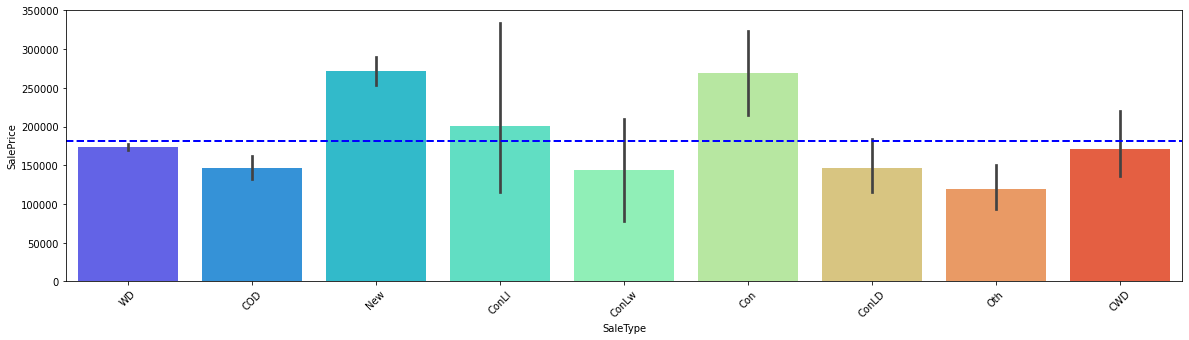

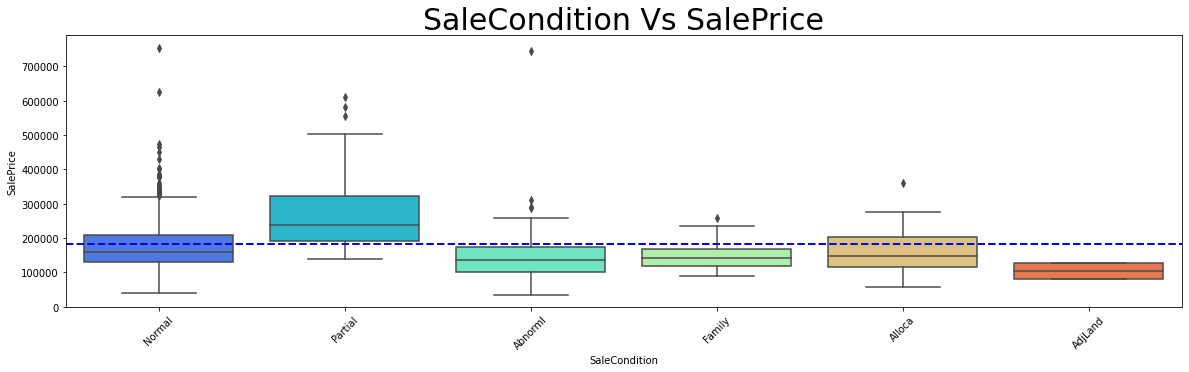

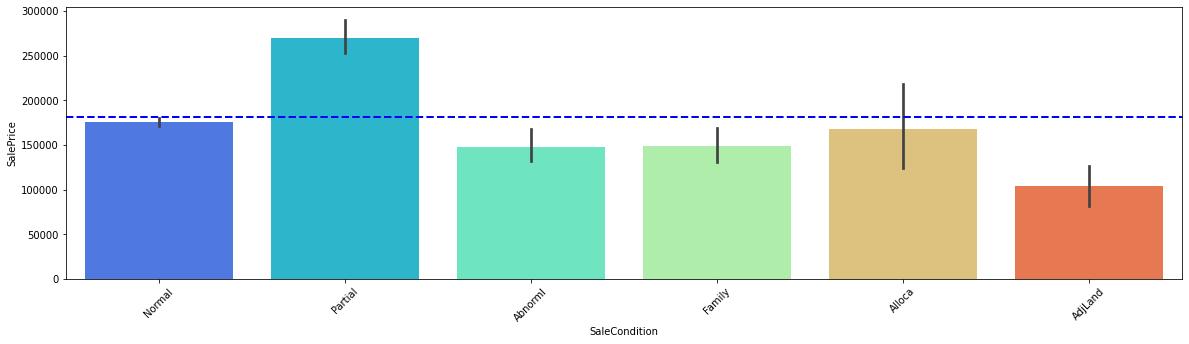

In [45]:
DF = df_train4.join(df_Target)
coll = ['PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


for i in coll:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(DF.SalePrice)
    sns.boxplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{i} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(20,5))
    sns.barplot(x = i,y = "SalePrice", data = DF, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.xticks(rotation=45)
    plt.show()

### Key Observations:
1. Paved Driveway with excellent pool condition, properly fenced with Tennis Court month sold is 7 is very costly.
2. year sold at 2007 with sale deed type Warranty Deed - Conventional Home was not completed when last assessed is costlier in market.

### Multivariate Analysis:

##### Table 1
Let visualize correlation of each variable with target variable.

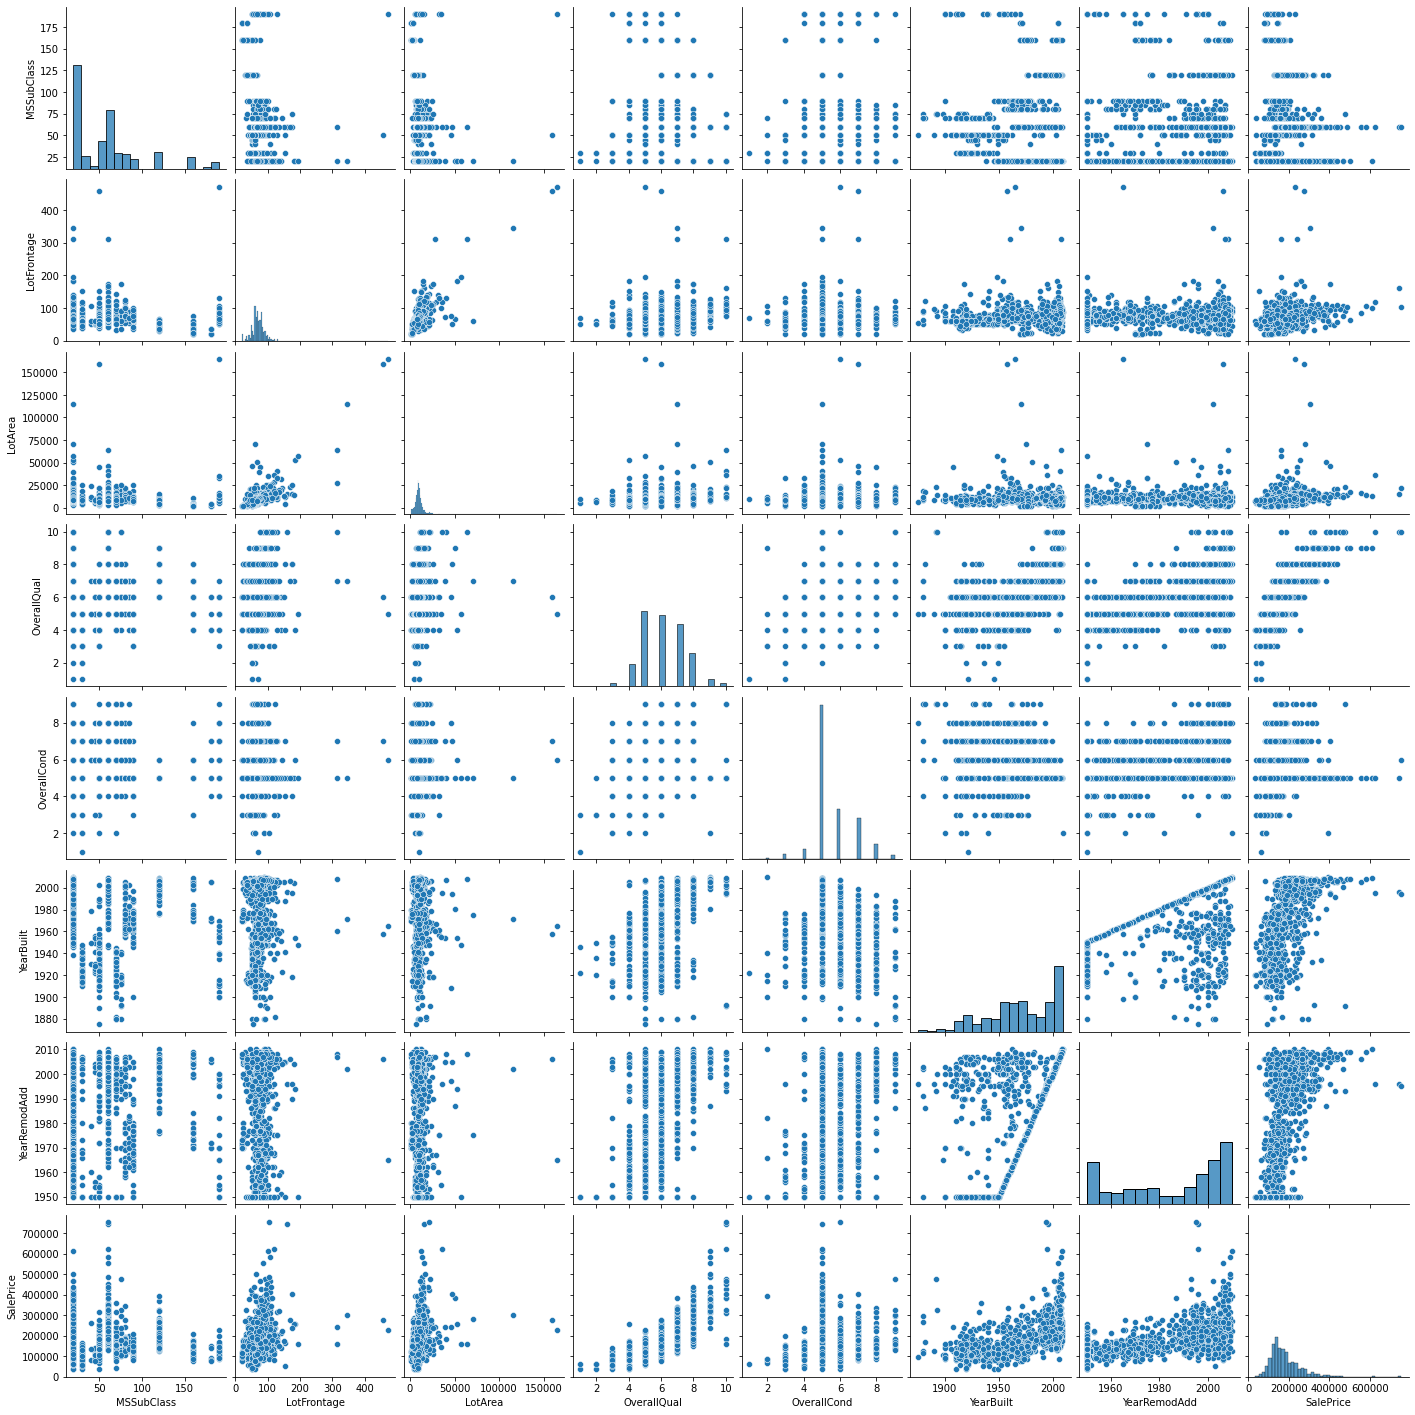

In [46]:
DF = df_train1.join(df_Target)
sns.pairplot(DF)

In [47]:
clos = DF.columns
nums_clos = DF._get_numeric_data().columns

Cat_col = list(set(clos)-set(nums_clos))


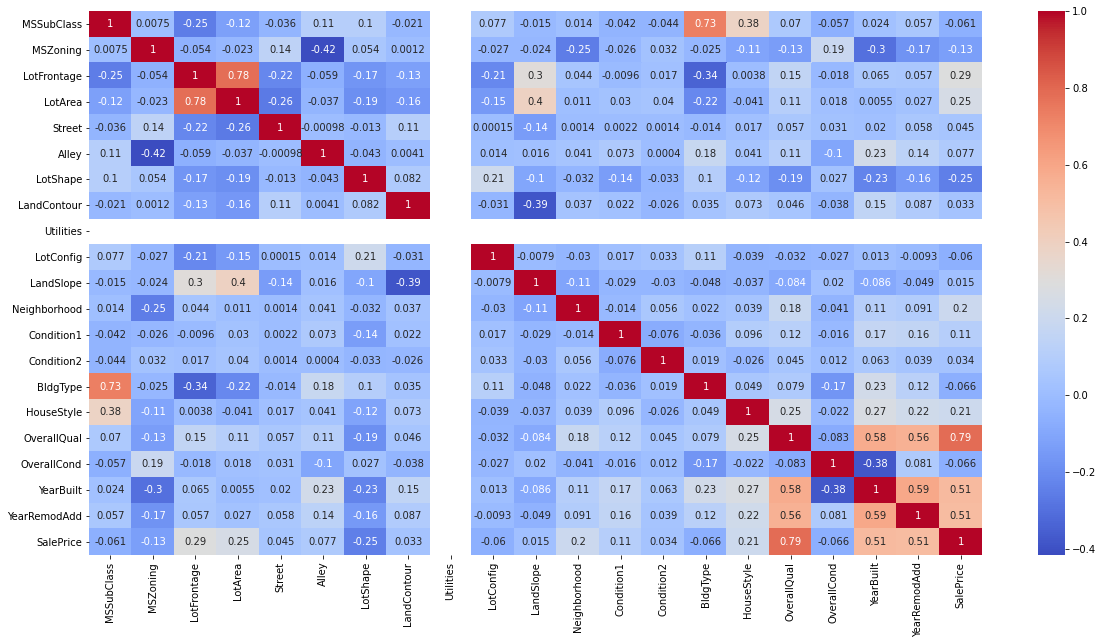

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
for i in Cat_col:
    DF[i] = le.fit_transform(DF[i])

plt.figure(figsize=(20,10))
sns.heatmap(DF.corr(), annot = True, cmap = "coolwarm")
plt.show()    

In [49]:
df_train.Utilities.unique() # Since Utilities have only one values in all the columns it has no correlation.

array(['AllPub'], dtype=object)

### Key observations(Pair plot and correlation Heat map):
1. Since Utilities have only one values in all the columns it has no correlation. we will drop this column since it wont help in building the model.
2. The table have more positive correlation at the bottom. Over all Quality yearbuilt year remodified have high corelation with sales prize.

##### Table 2
Let visualize correlation of each variable with target variable.

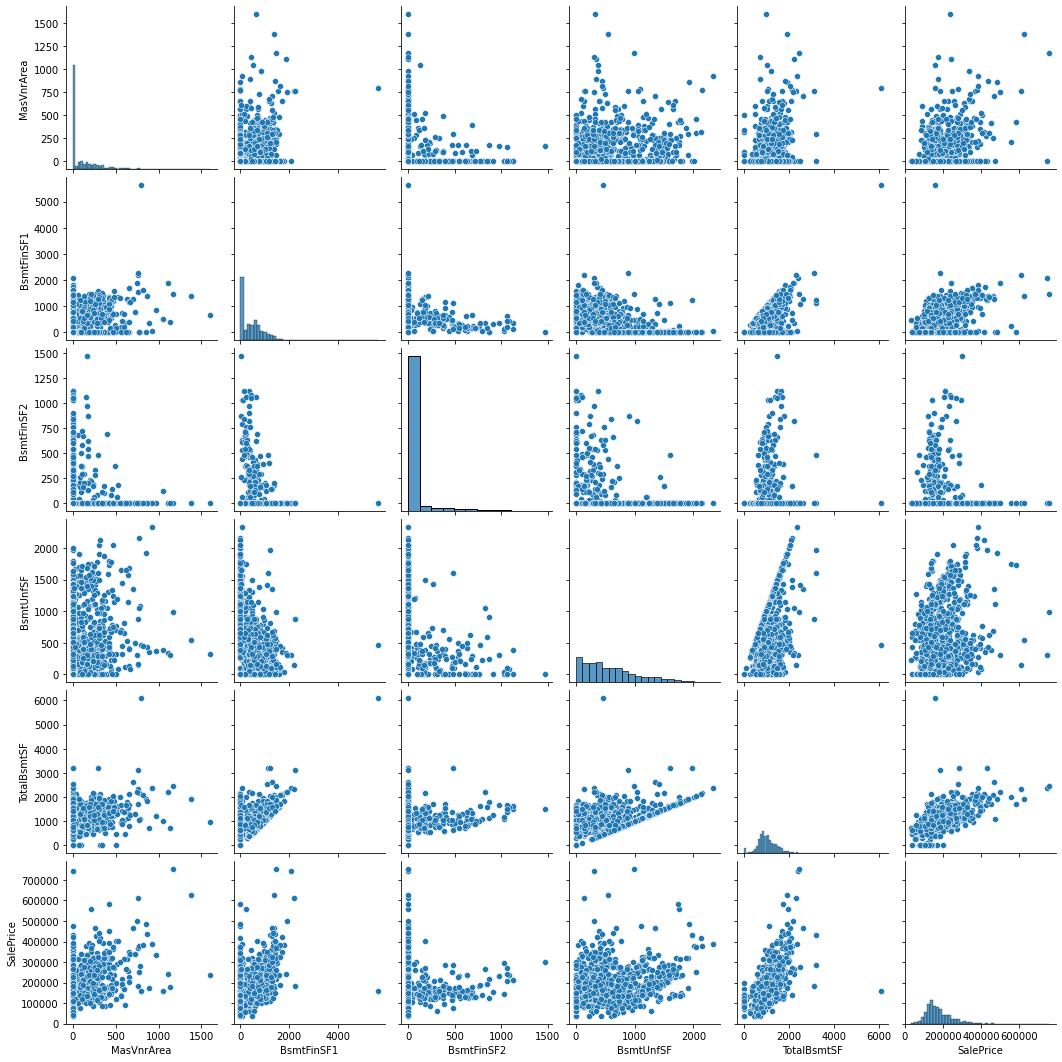

In [50]:
DF = df_train2.join(df_Target)
sns.pairplot(DF)

In [51]:
clos = DF.columns
nums_clos = DF._get_numeric_data().columns

Cat_col = list(set(clos)-set(nums_clos))


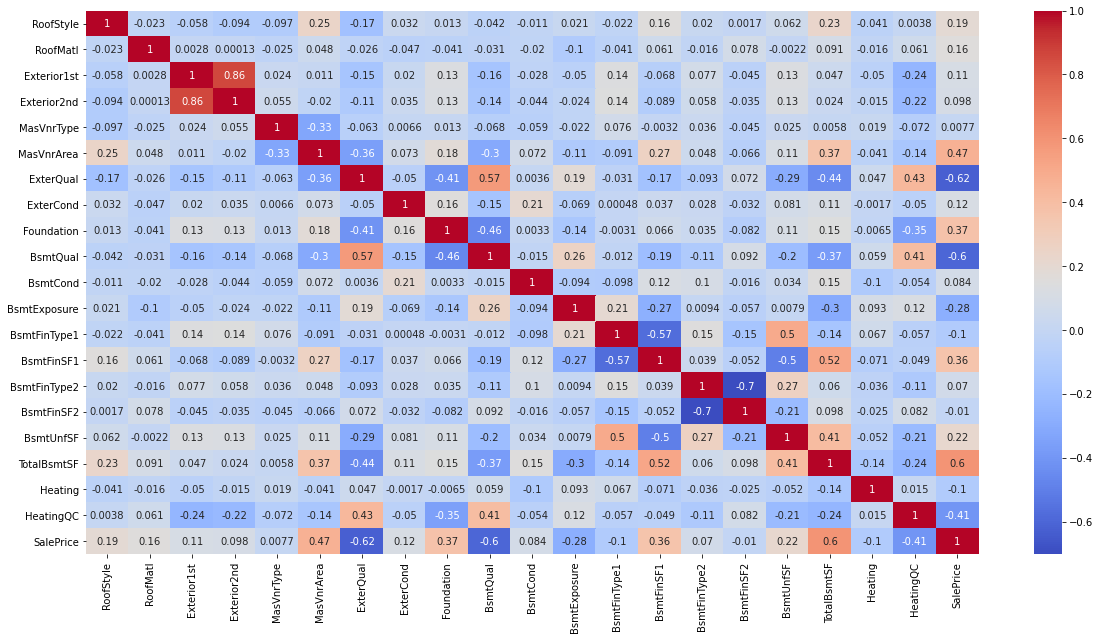

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
for i in Cat_col:
    DF[i] = le.fit_transform(DF[i])

plt.figure(figsize=(20,10))
sns.heatmap(DF.corr(), annot = True, cmap = "coolwarm")
plt.show()    

### Key observations(Pair plot and correlation Heat map):
1. We can observe according to the  correlations the scattedplot points are distributed.
2. we can observe the feature variable have lesser correlation among themselves but they have high correlation with target variable.
3. Exterior1st and Exterior2nd have high correlation with themselves to avoid multicollinearity we will drop Exterior2nd.

##### Table 3
Let visualize correlation of each variable with target variable.

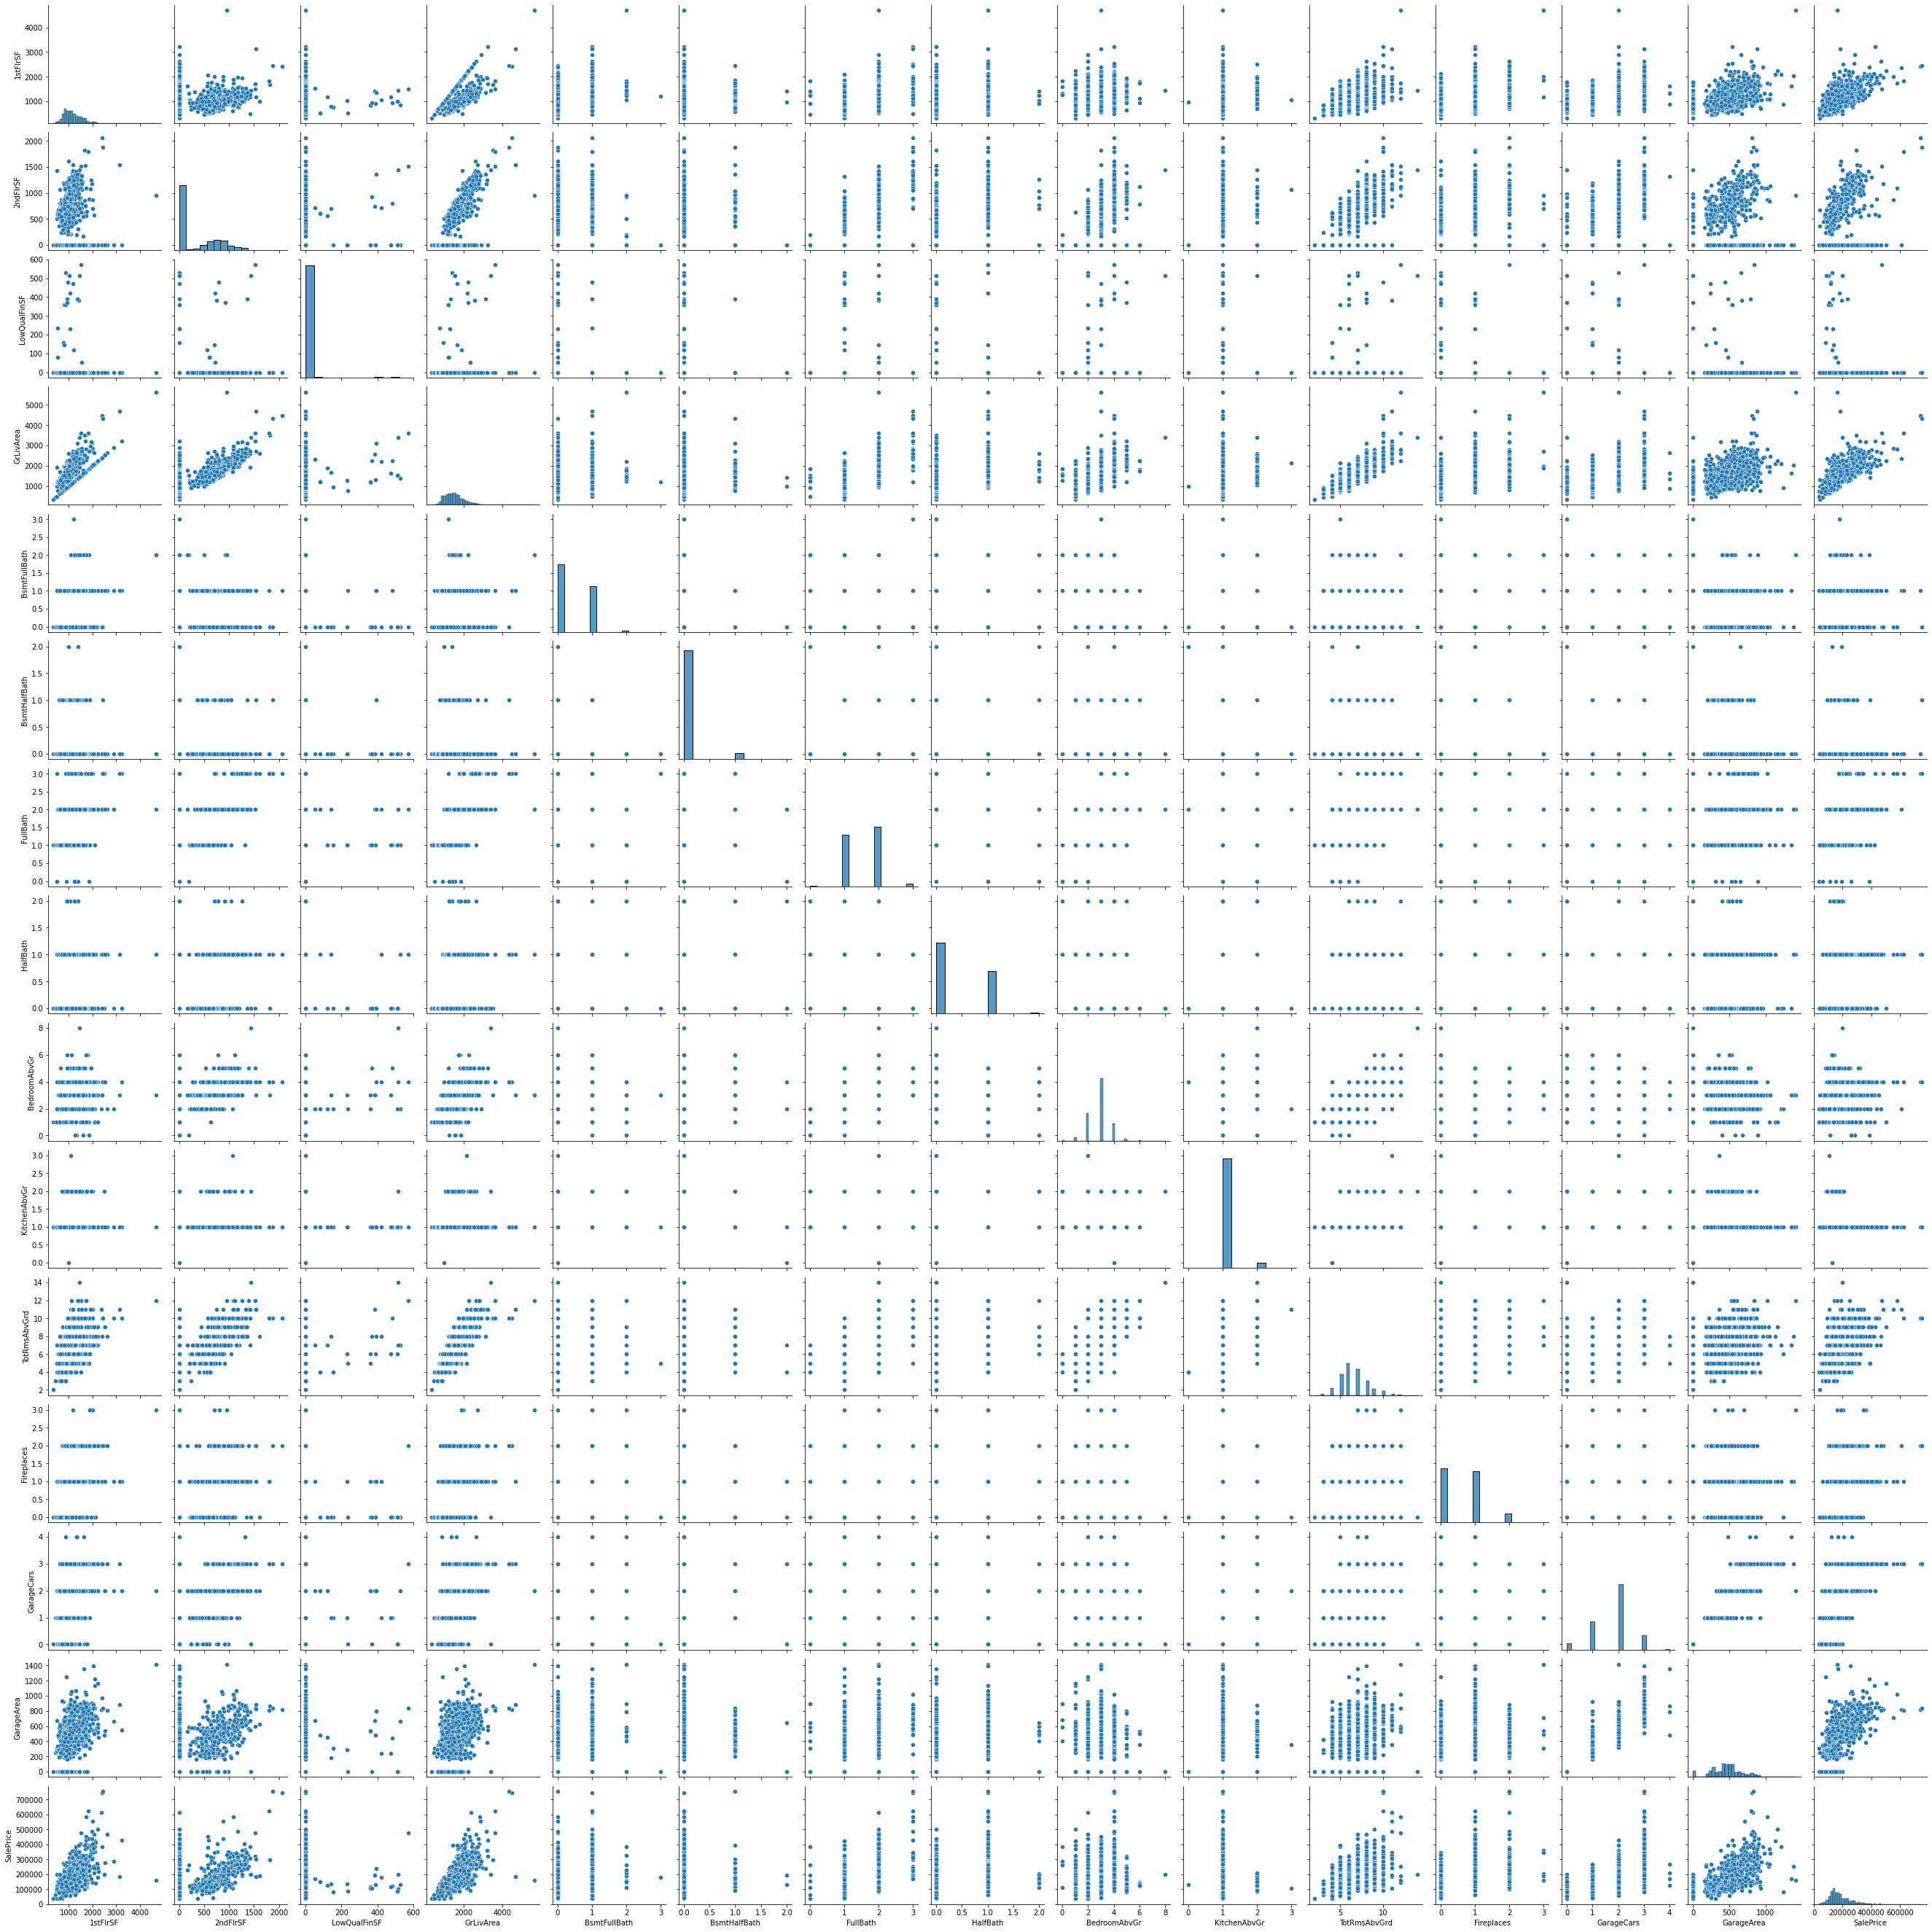

In [53]:
DF = df_train3.join(df_Target)
sns.pairplot(DF)

In [54]:
clos = DF.columns
nums_clos = DF._get_numeric_data().columns

Cat_col = list(set(clos)-set(nums_clos))
Cat_col, nums_clos

(['GarageQual',
  'CentralAir',
  'Electrical',
  'GarageFinish',
  'GarageType',
  'FireplaceQu',
  'KitchenQual',
  'GarageCond',
  'Functional',
  'GarageYrBlt'],
 Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice'],
       dtype='object'))

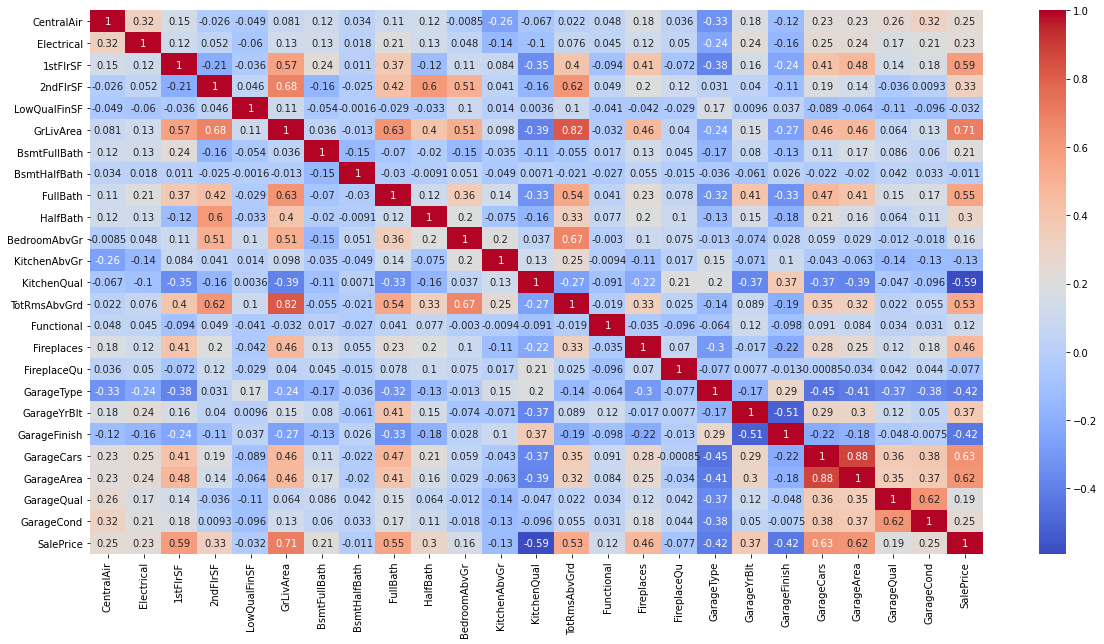

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
for i in Cat_col:
    DF[i] = le.fit_transform(DF[i])

plt.figure(figsize=(20,10))
sns.heatmap(DF.corr(), annot = True, cmap = "coolwarm")
plt.show()   

### Key observations(Pair plot and correlation Heat map):
1. We can observe according to the  correlations the scattedplot points are distributed.
2. we can see high positive correlation with the sales prize.
3. Garagecars, TotalrmsAbvGround can be removed to avoid multicollinearity.

##### Table 4
Let visualize correlation of each variable with target variable.

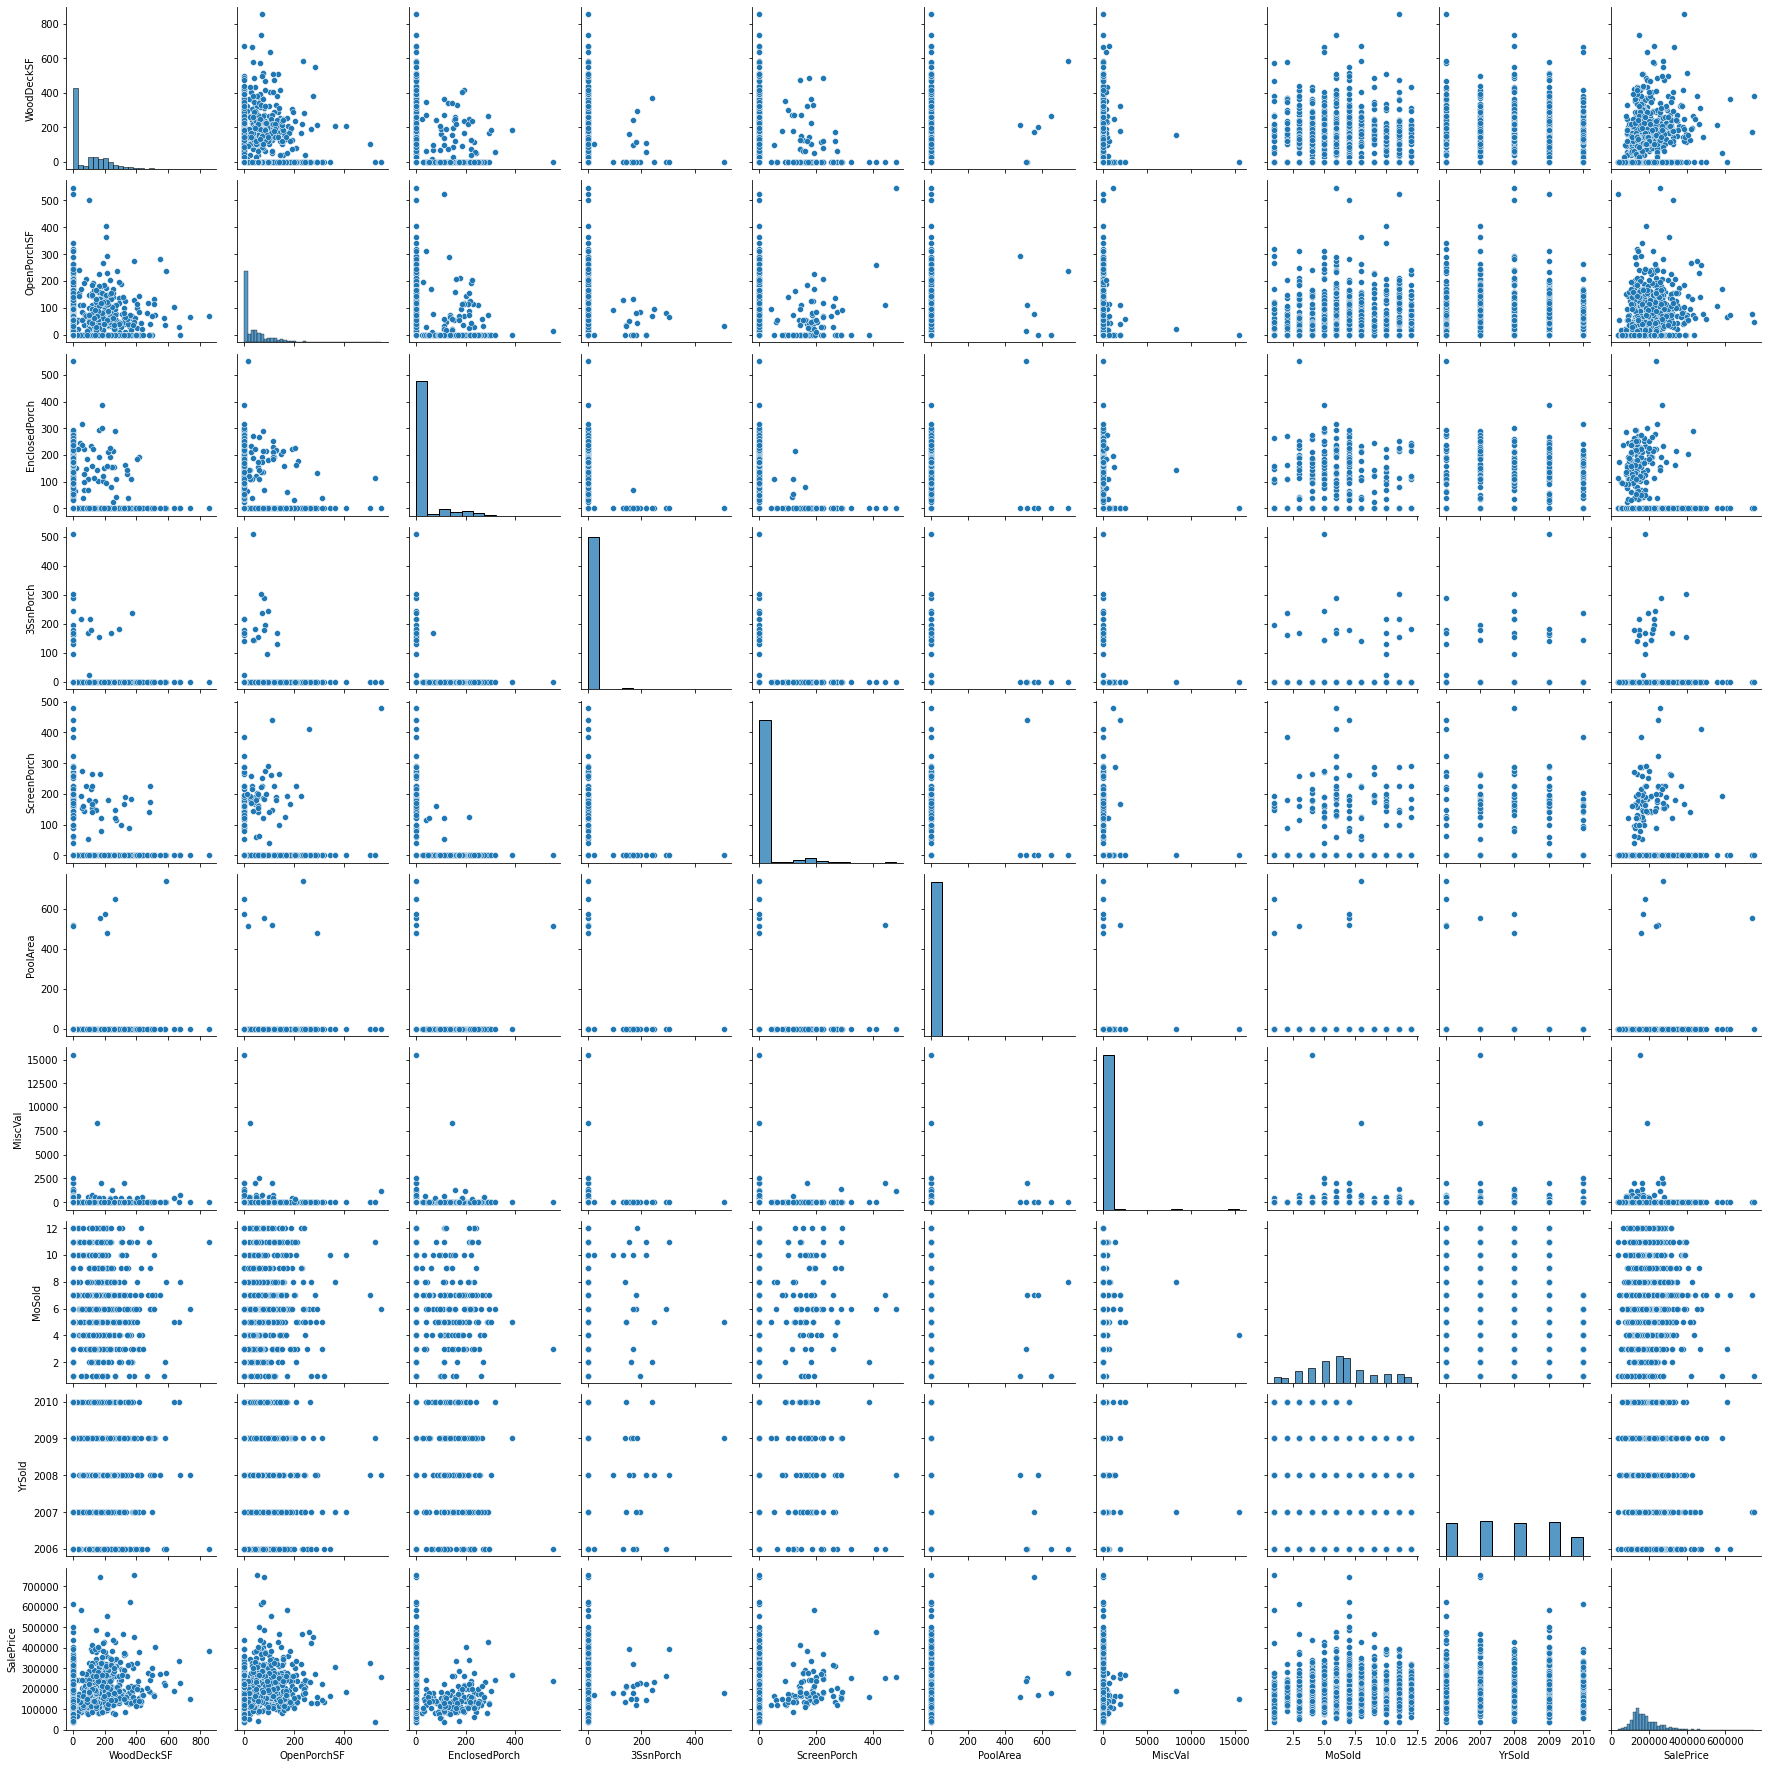

In [56]:
DF = df_train4.join(df_Target)
sns.pairplot(DF)

In [57]:
clos = DF.columns
nums_clos = DF._get_numeric_data().columns

Cat_col = list(set(clos)-set(nums_clos))
Cat_col , nums_clos

(['PavedDrive', 'MiscFeature', 'SaleCondition', 'SaleType', 'Fence', 'PoolQC'],
 Index(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'))

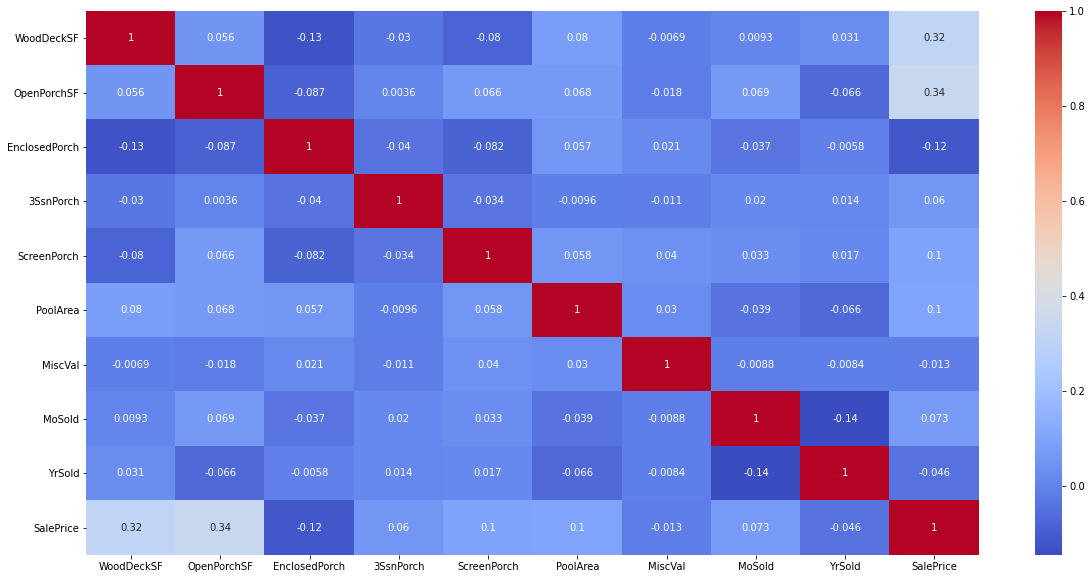

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(DF.corr(), annot = True, cmap = "coolwarm")
plt.show()

### key Observations:

### Key observations(Pair plot and correlation Heat map):
1. We can observe according to the  correlations the scattedplot points are distributed.
2. WoodsDeckSF and OpenPorchSF have high correlation with sales prize

### Lets Prepare the data for training remembering the above points from above analysis.

In [59]:
DF_train = pd.read_csv("C:/Users/Friday/Downloads/Project-Housing/Project-Housing_splitted/train.csv")

In [60]:
DF_continousvariables = DF_train[['LotFrontage','LotArea', "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea']]

In [61]:
DF_cv = DF_continousvariables
nums_clos = DF_cv.columns.values

### Lets observe the skewness and outliers in the Data.

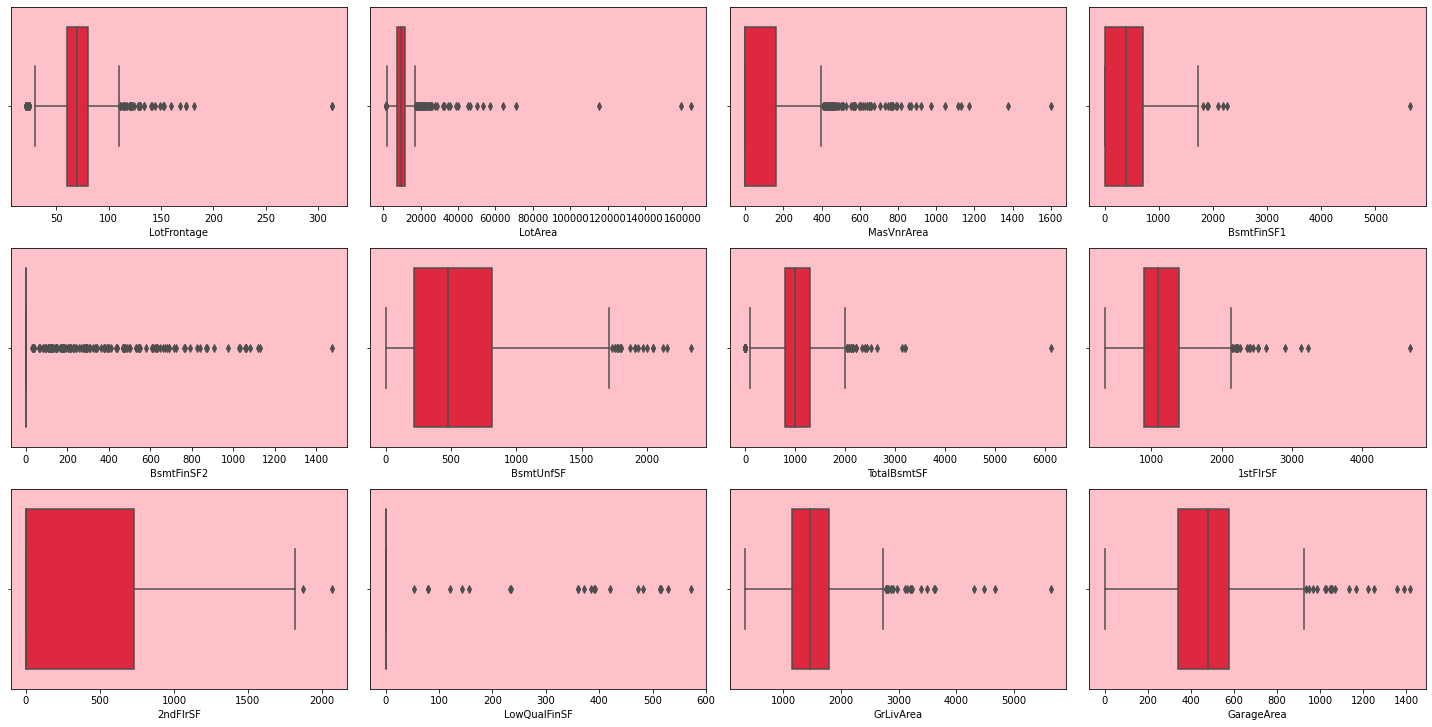

In [62]:
plt.figure(figsize=(20,50))
for i in range (0, len(nums_clos)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(DF_cv [nums_clos[i]], color = "#fb0a29" , orient = "h")
    ax.set_facecolor("#fec1c9")
    plt.tight_layout()

Key Observations:
    1. We observe that data have too many outliers lets identify that mathematically.

In [63]:
from scipy.stats import zscore

z= np.abs(zscore(DF_cv))
threshold= 3
df_new = DF_cv[(z < 3).all(axis=1)]

In [64]:
print(f"Orginal Data {DF_cv.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((1168-0)/1168)*100}%")

Orginal Data (1168, 12)
After Removing outliers (0, 12)
The percentage of data loss 100.0%


As we observe that removing Outliers we will completely loss the data so we have to work with outliers present in the data

BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


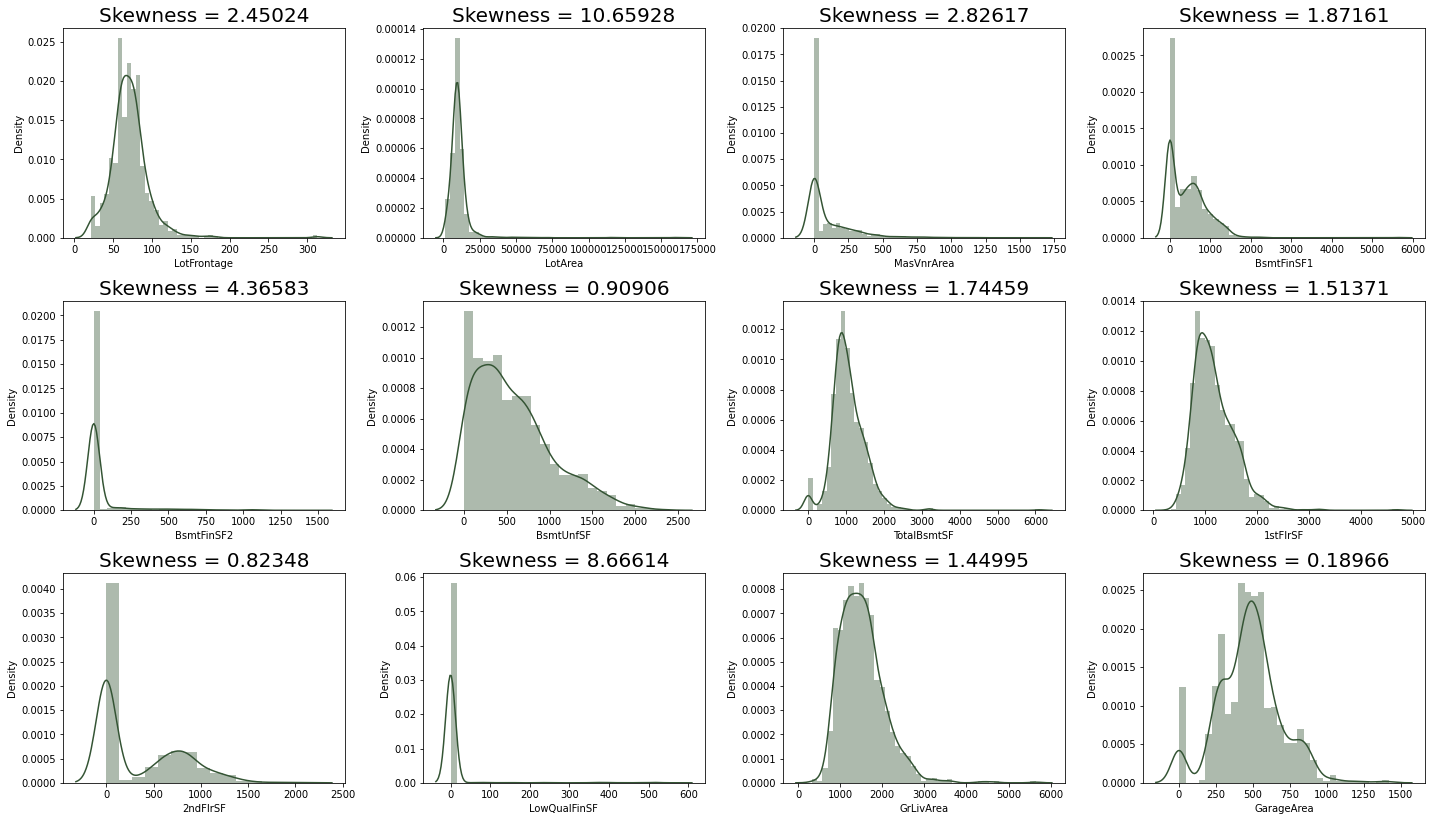

In [65]:
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(20,30))
for i in range (0, len(nums_clos)):
    plt.subplot(8,4,i+1)
    plt.title(f"Skewness = {round(DF_cv[nums_clos[i]].skew(),5)}",fontsize=20)         
    sns.distplot(DF_cv[nums_clos[i]], color = '#345434')
    plt.tight_layout() 

the skewness that we observe will be rectified in training the data by power transformation method

###### Splitting the Data For Training

In [66]:
x_1=DF_train.drop(["SalePrice"], axis = 1)
y_1=DF_train.SalePrice

In [67]:
def Data_Preparation(df): ### Creating function for Preprocessing the data.
    """The Function that returns the preprocessed Data to train"""
    
    ### Droping the unwanted data-----------------------------------------------------------------------------------------(1)
    df.drop(['Id', 'Utilities', 'Exterior2nd', 'GarageCars', 'TotRmsAbvGrd'], axis=1, inplace = True)
    
    ### Imputing the missing Values---------------------------------------------------------------------------------------(2)
    df['Alley'].replace(np.nan, 'No_access', inplace = True)
    
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(df_train1[['LotArea','LotFrontage']])
    df[['LotArea','LotFrontage']] = np.round(imp.transform(df[['LotArea','LotFrontage']]))
    
    for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']:
        df[i].replace(np.nan, 'No_Basement', inplace = True)
    
    df['MasVnrType'].replace(np.nan,df['MasVnrType'].describe().top, inplace = True)
    df[['MasVnrArea', 'TotalBsmtSF']] = np.round(imp.fit_transform(df[['MasVnrArea', 'TotalBsmtSF']]))

    for i in ['GarageType', 'GarageFinish','GarageQual','GarageCond']:
        df[i].replace(np.nan, 'No_Garage', inplace = True)
        
    df['GarageYrBlt'].replace(np.nan, 0, inplace = True)      
    df['FireplaceQu'].replace(np.nan, 'No_Fireplace', inplace = True)
    df['Electrical'].replace(np.nan,df['Electrical'].describe().top, inplace = True)

    df['PoolQC'].replace(np.nan, 'No_Pool', inplace = True)
    df['Fence'].replace(np.nan, 'No_Fence', inplace = True)
    df['MiscFeature'].replace(np.nan, 'None', inplace = True)
    
    ###Encoding the Data converting to numerical value-------------------------------------------------------------------(3)
    clos = df.columns
    nums_clos = df._get_numeric_data().columns

    Cat_col = list(set(clos)-set(nums_clos))

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
 
    for i in Cat_col:
        df[i] = le.fit_transform(df[i])
    
    ###power_transform the Data to reduce the skewness and outliers------------------------------------------------------(4)
    from sklearn.preprocessing import power_transform
    df=power_transform(df,method="yeo-johnson")
    df 
    
    return df

In [68]:
x_1 = Data_Preparation(x_1)

In [69]:
x_1.shape

(1168, 75)

### Selecting parameters for training

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 88.35540389186862 found on randomstate 454


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate, shuffle = True)

In [72]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model


In [73]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [74]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.8160702736441051

ERROR:
MEAN ABSOLUTE ERROR:  19405.81374410682
MEAN SQUARED ERROR:  687214229.5797697
ROOT MEAN SQUARED ERROR : 26214.771209754428
R2 SCORE:  0.8835540389186862
**********************************************************************************************************



Score of Lasso() is: 0.8170190857349736

ERROR:
MEAN ABSOLUTE ERROR:  19645.37113382834
MEAN SQUARED ERROR:  696190354.4651748
ROOT MEAN SQUARED ERROR : 26385.41935359707
R2 SCORE:  0.8820330670818457
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.8170139896465003

ERROR:
MEAN ABSOLUTE ERROR:  19620.380353916553
MEAN SQUARED ERROR:  695018330.1711792
ROOT MEAN SQUARED ERROR : 26363.200302148052
R2 SCORE:  0.8822316623516329
**********************************************************************************************************



Score of ElasticNet() is: 0.7

In [75]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.79171163 0.76042486 0.57307388 0.83128707 0.79012308]
MEAN OF SCORE is : 0.7493241035500566
Standard Deviation : 0.09095774249733514
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.7917087  0.76048646 0.57319966 0.83128643 0.79012589]
MEAN OF SCORE is : 0.7493614267775168
Standard Deviation : 0.09091036752251802
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.79162582 0.76105635 0.575443   0.83128324 0.79044955]
MEAN OF SCORE is : 0.7499715911020807
Standard Deviation : 0.0900757736791359
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.7812854  0.76951768 0.67715273 0.82212635 0.83073696]
MEAN OF SCORE 

In [76]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

MODEL     SCORE  CV_mean_score    CV_STD           MBE  \
8  RandomForestRegressor  0.976888       0.848460  0.032119  18323.940959   
7      AdaBoostRegressor  0.874343       0.808786  0.040002  25181.907319   
3             ElasticNet  0.797024       0.776164  0.054707  19202.666335   
2                  Ridge  0.817014       0.749972  0.090076  19620.380354   
1                  Lasso  0.817019       0.749361  0.090910  19645.371134   
0       LinearRegression  0.816070       0.749324  0.090958  19405.813744   
5    KNeighborsRegressor  0.801678       0.738769  0.019570  24837.043151   
6  DecisionTreeRegressor  1.000000       0.710734  0.061716  28637.479452   
4                    SVR -0.041009      -0.061789  0.050386  57169.267411   

            MSE          RMSE        R2  
8  6.479206e+08  25454.285476  0.890212  
7  1.089128e+09  33001.945572  0.815451  
3  7.950430e+08  28196.506014  0.865283  
2  6.950183e+08  26363.200302  0.882232  
1  6.961904e+08  26385.419354  0.882033  
0  6.872142e+08  26214.771210  0.883554  
5  1.410387e+09  37555.125053  0.761015  
6  1.626216e+09  40326.363958  0.724444  
4  6.216638e+09  78845.658062 -0.053387

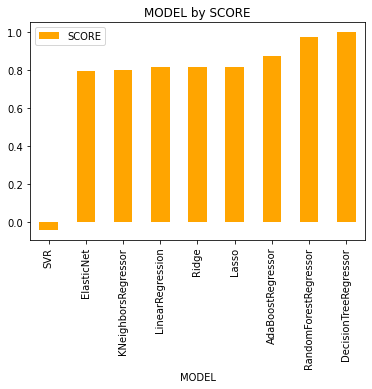

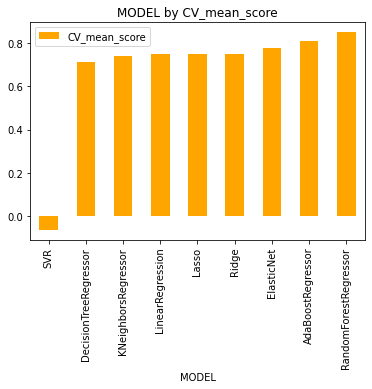

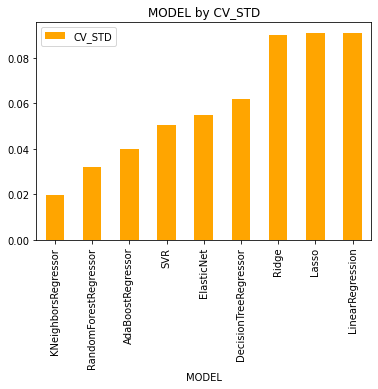

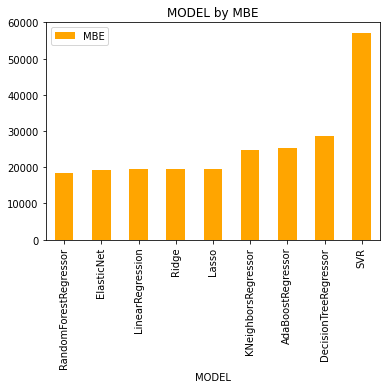

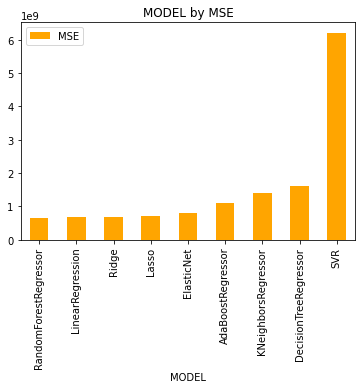

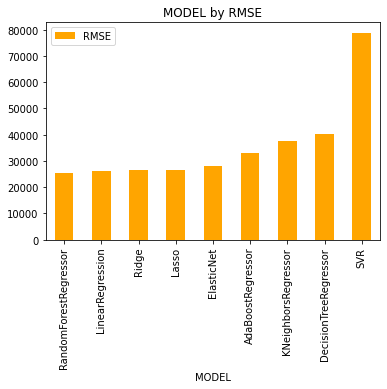

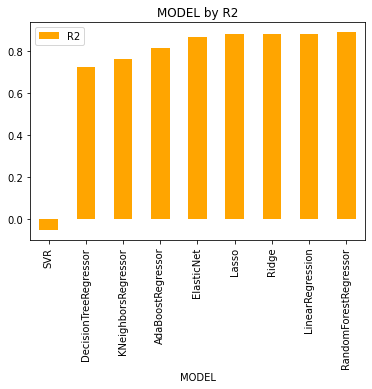

In [77]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From above we can see that Random forest regressor and Decision tree regressor have high scores of 97% and 100% but cross validation average in Random forest is 84% which is higher than 70% of Decision tree regressor.
>From Above its is evident that Randomforest is the best model with Score of 0.97 lets try in Hyper tuning the same for improved performance.

In [78]:
rf = RandomForestRegressor(random_state=42)

In [79]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.890212193748729, 0.9768879289793189)

In [81]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### HYPERPARAMETER TUNING....

In [82]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [83]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.5min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [84]:
grid_search.best_score_

0.8504290189576658

In [85]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [86]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='sqrt',
                      n_estimators=50, random_state=42)

In [87]:
reg_final_model = grid_search.best_estimator_


In [88]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='sqrt',
                      n_estimators=50, random_state=42)

In [89]:
reg_final_model.score(x_train,y_train), reg_final_model.score(x_test,y_test)

(0.9999994772684867, 0.8934153259916571)

### Summary:

>We have cleansed our data and prepared for training on splitting it on Target and Feature variable. On training or data with 9 models we have finalize RandomForest Regressor with model score of 97% and with CV-Score of 84%. Further to increase the performance of our model we have hyperparameter tuned our model with GridSearchCV and we have reduced the under fitting and our final model score is 0.999 with grid search best_score_ of 0.85. We are saving our model on best_estimator_ for future prediction...

### Saving the model:

In [90]:
import joblib
joblib.dump(reg_final_model,"HOUSE-PRICEPREDICTION.obj")

['HOUSE-PRICEPREDICTION.obj']

### Lets import and clean  Test data.

In [91]:
DF_test= pd.read_csv("C:/Users/Friday/Downloads/Project-Housing/Project-Housing_splitted/test.csv")

In [92]:
x_T = Data_Preparation(DF_test)

In [93]:
Price_Prediction= joblib.load('HOUSE-PRICEPREDICTION.obj')
predi= Price_Prediction.predict(x_T)
prediction = [round(i) for i in predi]  

In [94]:
Price_Prediction.score(x_T,predi)

1.0

In [95]:
HOUSE_PRICE_Predicted=pd.DataFrame({"HOUSE-PRICE_Predicted":prediction})
HOUSE_PRICE_Predicted.head()

HOUSE-PRICE_Predicted
0               317369.0
1               203012.0
2               260685.0
3               172166.0
4               236337.0

In [96]:
HOUSE_PRICE_Predicted.describe()

HOUSE-PRICE_Predicted
count             292.000000
mean           180570.078767
std             64863.243561
min             82090.000000
25%            135660.000000
50%            167074.000000
75%            207489.750000
max            415144.000000

In [97]:
HOUSE_PRICE_Predicted.to_csv("HOUSE-PRICE_Predicted.csv") #we are saving our model in CSV format.

### Conclusion:
1. The above study helps us to understand the business of real estate. How the price is changing across the Properties.
2. With the Study we can tell how multiple real estate amenities like swimming pool, garage, pavement and lawn size of Lot Area, and type of Building raise decides the cost.
3. With the help of the above analysis we can sketch the needs of a property buyer and according to need we can project the price of the  property. 